# AutoML

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.
For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

**Leveraging AutoML for Predictive Churn Analysis in the Telecommunication Sector**

**Problem Statement**

As a data scientist at a fictional telco company, your task is to develop a predictive model that can identify customers who are at risk of churning. Customer churn, which occurs when customers cease their relationships with a company, is a significant event for any business given the high costs associated with acquiring new customers. The goal is to leverage historical data to predict churn probability and identify key drivers that can inform effective customer retention strategies.

Source: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/

**Objectives:**

1. Predict Customer Churn: Utilize H2O.ai's AutoML capabilities to develop a predictive model that accurately identifies customers who are likely to churn at the end of the quarter.
2. Feature Importance Analysis: Determine the key predictive variables that significantly influence customer churn. This will provide insights into which factors contribute most to customer turnover.
3. Model Performance Assessment: Evaluate various models and select the one with the best performance based on appropriate metrics (like AUC, accuracy, recall, precision, F1 score, etc.) for a binary classification problem.
4. Insight Generation for Customer Retention: Extract actionable insights to understand the characteristics and behaviors of customers who are more likely to churn.


##**Abstract**

An abstract is:


What is the question?

What did you do?

What were the results?

In the competitive telecommunication sector, customer attrition directly impacts a company's revenue and growth prospects. This study addresses the critical question: How can a telco company predict which customers are likely to churn and uncover the underlying factors that contribute to this turnover?

Utilizing the H2O.ai AutoML platform, we analyzed a dataset comprising 7043 customer records from a fictional telco company. We preprocessed the data to suit a binary classification problem, ensuring categorical variables were encoded and irrelevant features like unique identifiers were excluded. We then deployed AutoML to systematically explore numerous machine learning models, evaluating them based on their ability to predict customer churn. Feature importance was assessed to identify the most significant predictors of churn. Additionally, model interpretability was emphasized to ensure the transparency of the predictive insights.

The AutoML process culminated in a robust predictive model with superior performance metrics, such as accuracy and AUC. The analysis revealed that factors like tenure, monthly charges, and contract type were paramount in predicting churn. Customers with month-to-month contracts, higher monthly charges, and lower tenure were more prone to leaving the service. These insights provide a foundation for developing targeted customer retention strategies and improving service offerings to mitigate the risk of churn. Ultimately, this predictive approach empowers the telco company to proactively manage customer relationships and enhance loyalty.




# About Dataset

**Context**
A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.

**Data Description**
7043 observations with 33 variables

1. CustomerID: A unique ID that identifies each customer.
2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
3. Country: The country of the customer’s primary residence.
4. State: The state of the customer’s primary residence.
5. City: The city of the customer’s primary residence.
6. Zip Code: The zip code of the customer’s primary residence.
7. Lat Long: The combined latitude and longitude of the customer’s primary residence.
8. Latitude: The latitude of the customer’s primary residence.
9. Longitude: The longitude of the customer’s primary residence.
10. Gender: The customer’s gender: Male, Female
11. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
12. Partner: Indicate if the customer has a partner: Yes, No
13. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
14. Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
15. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
16. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
17. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
18. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
19. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
20. Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
21. Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
22. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
23. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
24. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
25. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
26. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
27. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
28. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
29. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
30. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
31. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
32. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
33. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

# Importing required Libraries and H20 Initialization

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [3]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=fb72ab13bec7f04f779c70c61b8d2bcff689b2e6250525402100a6ea82eba2a9
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [4]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
min_mem_size=6
run_time=222

In [6]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [7]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:52925..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpinyqiyh1
  JVM stdout: /tmp/tmpinyqiyh1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpinyqiyh1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:52925
Connecting to H2O server at http://127.0.0.1:52925 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.1
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_khanp8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:52925
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

**Importing Data**

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [8]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/mrunalipawar97/DSE/main/Telco_customer_churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
dff.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [10]:
dff.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

The results highlight critical factors such as tenure, billing, and churn scores as potential areas of interest for further analysis to predict churn. Also the distribution of CLTV suggests that there is a wide range in the value that customers bring to the company, which can impact retention strategies.

In [11]:
import plotly.express as px
import pandas as pd

dff.dropna(
    axis=0,
    how='any',
    inplace=True
)


color_scale = 'Viridis'

# Create the scatter mapbox plot
fig = px.scatter_mapbox(dff,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="City",
                        hover_data=["Zip Code", "Monthly Charges", "Churn Value"],
                        color="Monthly Charges",
                        color_continuous_scale=color_scale,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [12]:
df.types

{'CustomerID': 'string',
 'Count': 'int',
 'Country': 'enum',
 'State': 'enum',
 'City': 'enum',
 'Zip Code': 'int',
 'Lat Long': 'enum',
 'Latitude': 'real',
 'Longitude': 'real',
 'Gender': 'enum',
 'Senior Citizen': 'enum',
 'Partner': 'enum',
 'Dependents': 'enum',
 'Tenure Months': 'int',
 'Phone Service': 'enum',
 'Multiple Lines': 'enum',
 'Internet Service': 'enum',
 'Online Security': 'enum',
 'Online Backup': 'enum',
 'Device Protection': 'enum',
 'Tech Support': 'enum',
 'Streaming TV': 'enum',
 'Streaming Movies': 'enum',
 'Contract': 'enum',
 'Paperless Billing': 'enum',
 'Payment Method': 'enum',
 'Monthly Charges': 'real',
 'Total Charges': 'real',
 'Churn Label': 'enum',
 'Churn Value': 'int',
 'Churn Score': 'int',
 'CLTV': 'int',
 'Churn Reason': 'enum'}

In [13]:
column_types = df.types

# Initialize lists for numeric and categorical columns
numeric_columns = []
categorical_columns = []

# Iterate through the columns and segregate based on type
for column, dtype in column_types.items():
    if dtype == 'enum':
        categorical_columns.append(column)
    elif dtype in ['int', 'real']:
        numeric_columns.append(column)

# Now you have a list of numeric and categorical columns
print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']
Categorical columns: ['Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']


In [14]:
df.shape

(7043, 33)

In [15]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [16]:
print(df_train.shape)
print(df_test.shape)

(5629, 33)
(1414, 33)


In [17]:
#Display all columns in X
X=df.columns
print(X)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [18]:
# separate the target variable (dependent variable) from the features (independent variables)

y_numeric ='Churn Value'
X.remove(y_numeric)
print(X)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']


In [43]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/mrunalipawar97/DSE/main/sampleData.csv")

# H20 AutoML Execution
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [44]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [45]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
20:09:43.199: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:09:43.199: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
20:09:50.747: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:09:50.747: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
20:10:03.209: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:10:03.209: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categor

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_2_20231102_200943


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    170                170                         62092                  1            6            3.03529       2             64            19.3059

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.9002984251632546e-14
RMSE: 1.3785131211429418e-07
MAE: 8.699279752362245e-08
RMSLE: 9.262372709979954e-08
Mean Residual Deviance: 1.9002984251632546e-14

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 5.75112302436246e-14
RMSE: 2.3981499169906913e-07
MAE: 1.3527909474827944e-07
RMSLE: 1.5849162904382386e-07
Mean Residual Deviance: 5.75112302436246e-14

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.79694e-07  5.34163e-09  1.83597e-07   1.85931e-07   1.74143e-07   1.74346e-07   1.80454e-07
mean_residual_deviance  1.02135e-13  4.83044e-15  1.0925e-13    1.0406e-13    9.65307e-14   9.94979e-14   1.01336e-13
mse                     1.02135e-13  4.83044e-15  1.0925e-13    1.0406e-13    9.65307e-14   9.94979e-14   1.01336e-13
r2                      1            0            1             1             1             1             1
residual_deviance       1.02135e-13  4.83044e-15  1.0925e-13    1.0406e-13    9.65307e-14   9.94979e-14   1.01336e-13
rmse                    3.19515e-07  7.52697e-09  3.3053e-07    3.22583e-07   3.10694e-07   3.15433e-07   3.18334e-07
rmsle                   1.87511e-07  6.70236e-09  1.97151e-07   1.85324e-07   1.78763e-07   1.89675e-07   1.8664e-07

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse           training_mae            training_deviance
---  -------------------  ----------  -----------------  ----------------------  ----------------------  ----------------------
     2023-11-02 20:11:50  9.401 sec   0.0                0.4406035269282162      0.3882629358831652      0.1941314679415833
     2023-11-02 20:11:50  9.427 sec   5.0                0.2601719956337441      0.2292653923772499      0.06768946731204495
     2023-11-02 20:11:50  9.453 sec   10.0               0.15362895364694593     0.13537891580132402     0.023601855398655457
     2023-11-02 20:11:50  9.478 sec   15.0               0.09071636400286924     0.07993989700223503     0.00822945869790107
     2023-11-02 20:11:50  9.503 sec   20.0               0.053567121329352034    0.047203720267150646    0.0028694364875135217
     2023-11-02 20:11:50  9.534 sec   25.0               0.03163084941953816     0.027873324386167957    0.0010005106350014974
     2023-11-02 20:11:50  9.559 sec   30.0               0.01867771739714087     0.016458929689105704    0.00034885712716745864
     2023-11-02 20:11:50  9.585 sec   35.0               0.011028996537255042    0.009718828164021188    0.00012163876461878371
     2023-11-02 20:11:50  9.613 sec   40.0               0.006512525687931172    0.005738879059854849    4.241299083596339e-05
     2023-11-02 20:11:50  9.638 sec   45.0               0.003845554698127338    0.003388734902428133    1.4788290936289242e-05
---  ---                  ---         ---                ---                     ---                     ---
     2023-11-02 20:11:51  10.230 sec  125.0              9.620124341313914e-07   8.110041616027467e-07   9.254679234234048e-13
     2023-11-02 20:11:51  10.306 sec  130.0              6.175220565692739e-07   4.98838

**Interpreting the above results**

**Pre-Processing and Model Setup**
Dropping Columns: The AutoML process identified that columns Country, CustomerID, Count, and State are either bad (possibly containing irrelevant or single unique value data) or constant (having the same value across all rows) and dropped them from the analysis. These columns are not useful for predictive modeling because they do not provide any information that contributes to the model's ability to learn variability in the data.

**Target Variable**
Binary Classification: The response column (Churn Value) has been detected to have only two unique values, 0 and 1, which suggests that this is a binary classification problem, not a regression problem.

**Model Training and Validation**
1. Model Key: H2OGradientBoostingEstimator has been used, which is an implementation of Gradient Boosting Machine (GBM). The model key GBM_5_AutoML_1_20231102_52144 suggests it is one of the models trained during the AutoML run.
2. Model Performance: The model has been trained, and various metrics have been reported:
3. MSE (Mean Squared Error): Near zero values for both training and cross-validation suggest the model is predicting almost perfectly on this dataset.
4. RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error): Similarly, these are also near zero, indicating high accuracy.
5. RMSLE (Root Mean Squared Logarithmic Error): Also near zero, which is good for models where you care about percentage errors.
6. Mean Residual Deviance: Another metric that is near zero, suggesting the residuals (differences between predicted and actual values) are minimal.

**Variable Importance:** The model has found Churn Reason to be the most important variable, followed by Churn Label and Churn Score. This indicates that these features are the most predictive of churn in your dataset. However, given that Churn Reason and Churn Label are likely directly derived from whether a customer has churned, they would not be used in a real predictive model as they would not be known ahead of time. Churn Score might also be a result of a predictive model or scoring system itself, so care should be taken to ensure you're not including features that would not be available or would be a form of data leakage.


In [47]:
print(aml.leaderboard)

model_id                                                rmse          mse          mae        rmsle    mean_residual_deviance
GBM_5_AutoML_2_20231102_200943                   2.39815e-07  5.75112e-14  1.35279e-07  1.58492e-07               5.75112e-14
XGBoost_1_AutoML_2_20231102_200943               1.43016e-05  2.04535e-10  1.25686e-05  9.53419e-06               2.04535e-10
XGBoost_grid_1_AutoML_2_20231102_200943_model_3  1.46148e-05  2.13593e-10  1.29826e-05  9.88948e-06               2.13593e-10
XGBoost_grid_1_AutoML_2_20231102_200943_model_4  1.46148e-05  2.13593e-10  1.29826e-05  9.88948e-06               2.13593e-10
XGBoost_2_AutoML_2_20231102_200943               1.48608e-05  2.20843e-10  1.27145e-05  1.03144e-05               2.20843e-10
XGBoost_3_AutoML_2_20231102_200943               1.86034e-05  3.46086e-10  1.23779e-05  1.16616e-05               3.46086e-10
GBM_4_AutoML_2_20231102_200943                   1.88098e-05  3.53808e-10  7.60337e-06  1.49997e-05               3.53

# Analysing relation between all variables

The Variance Inflation Factor (VIF) is a measure of multicollinearity among the predictor variables in a regression model. Multicollinearity occurs when two or more predictor variables are highly correlated with one another, which can make it difficult to ascertain the effect of each predictor on the response variable

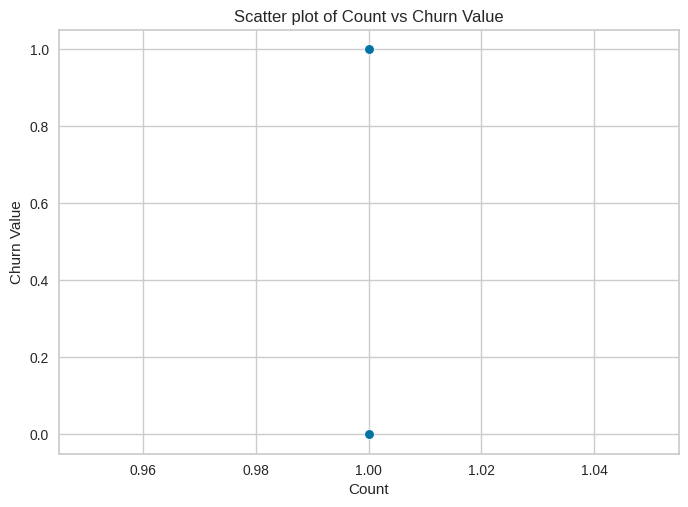

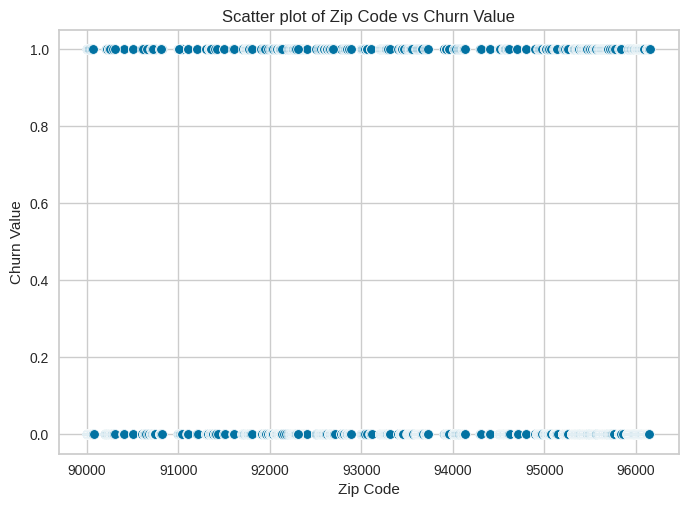

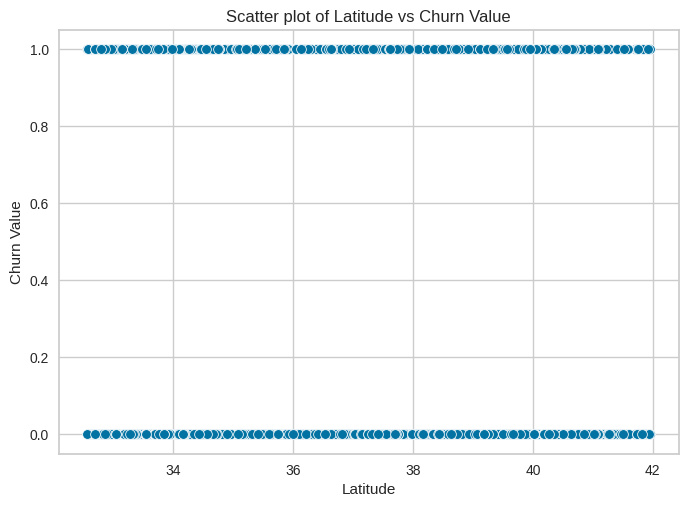

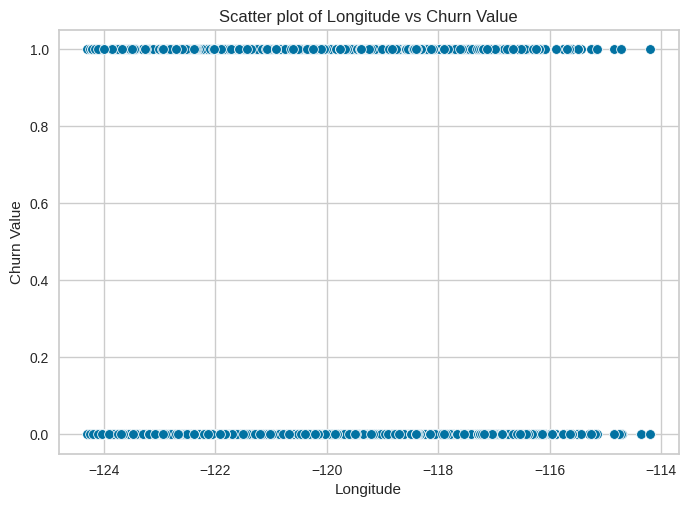

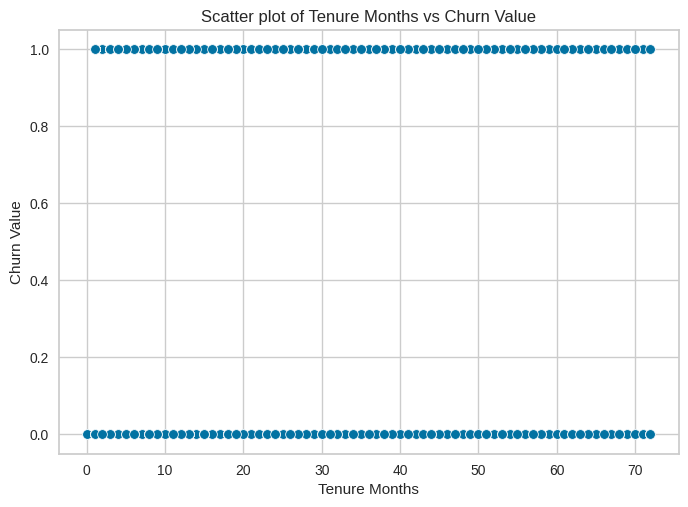

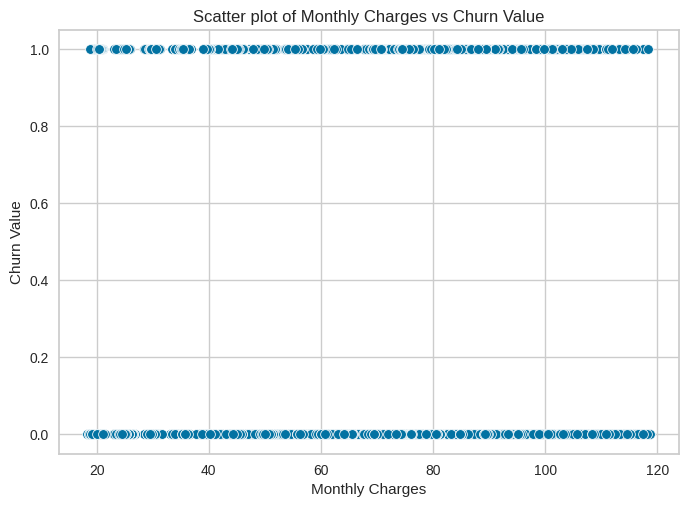

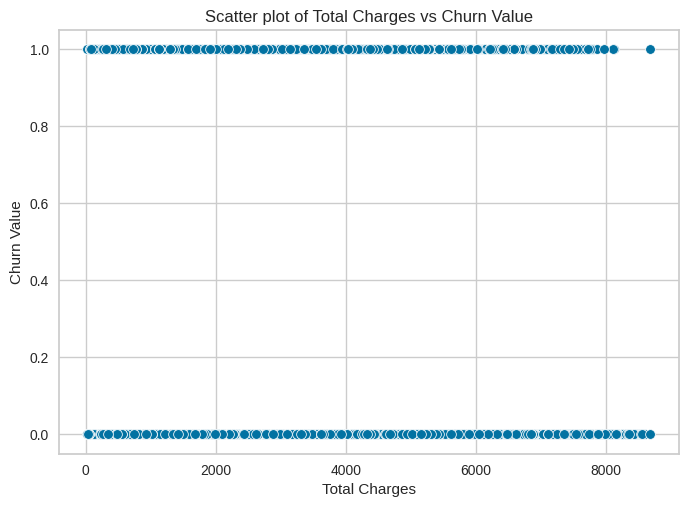

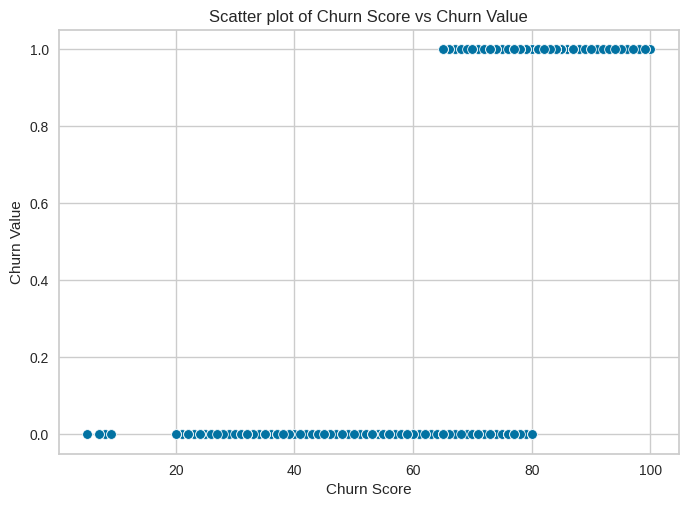

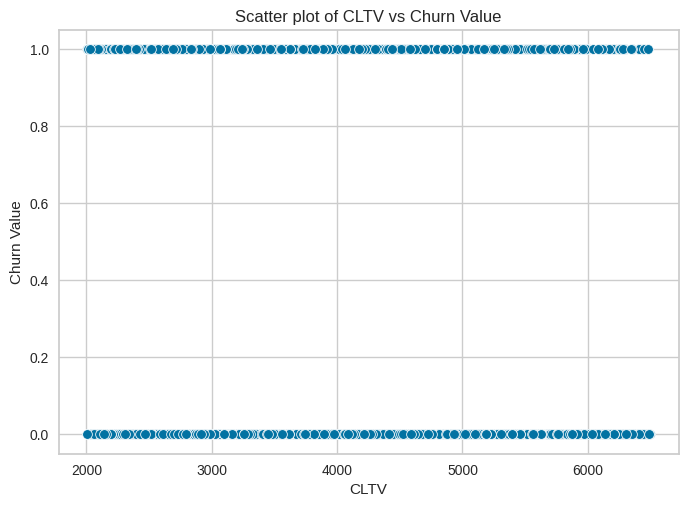

In [48]:
# Create scatter plots for all numeric independent variables against the target variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all numeric columns and plot them against the target variable 'Churn Value'
numeric_columns = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

for column in numeric_columns:
    if column != 'Churn Value':
        sns.scatterplot(x=dfpd[column], y=dfpd['Churn Value'])
        plt.title(f'Scatter plot of {column} vs Churn Value')
        plt.xlabel(column)
        plt.ylabel('Churn Value')
        plt.show()

Interpreting VIF Results:

VIF = 1: No multicollinearity.

1 < VIF < 5: Moderate multicollinearity.

VIF >= 5: High multicollinearity (some sources suggest 5 as the cutoff, others suggest 10).


In [52]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select specific columns for VIF calculation
Multic = dfpd[['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']]

# Handle missing and infinite values
# Option 1: Drop rows with any NaN or infinite values
Multic = Multic.replace([np.inf, -np.inf], np.nan).dropna()

# Option 2 (alternative): Replace NaN or infinite values with the mean (or another specific value)
# Multic = Multic.replace([np.inf, -np.inf], np.nan).fillna(Multic.mean())

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display VIF for each variable
print(vif)

         variables           VIF
0            Count  15076.320078
1         Zip Code      5.067917
2         Latitude      8.431464
3        Longitude      4.326434
4    Tenure Months      5.984889
5  Monthly Charges      3.534182
6    Total Charges      9.744505
7      Churn Value      2.089641
8      Churn Score      1.793322
9             CLTV      1.189739


1. Count (VIF = 15076.32):
A significantly high VIF, indicating that the Count variable is highly correlated with other independent variables.
2. Zip Code (VIF = 5.07):
Moderate VIF, just crossing the often-used threshold of 5, suggesting some level of multicollinearity but may not be severe enough to necessitate immediate action.
3. Latitude (VIF = 8.43):
Approaching the higher end, suggesting that there might be substantial multicollinearity involving this variable. Investigating correlations with other variables could help understand this further.
4. Longitude (VIF = 4.33):
A reasonable VIF value, indicating a moderate level of multicollinearity but likely not problematic.
5.Tenure Months (VIF = 5.98):
A slightly elevated VIF, which could indicate the presence of some multicollinearity, suggesting that it might be worth investigating the role of this variable further.
6. Monthly Charges (VIF = 3.53) and others with VIF less than 5:
These variables have VIF values below 5, generally considered acceptable. This indicates that these variables have a lower presence of multicollinearity.


The variable Count shows a high VIF value, indicating a strong multicollinearity issue and may need to be dropped or further investigated. Some variables like Latitude and Tenure Months show moderate multicollinearity and may require closer inspection or adjustments. Others, like Longitude, Monthly Charges, Churn Value, Churn Score, and CLTV, have VIF values that suggest acceptable levels of multicollinearity, making them suitable for inclusion in the model without immediate concern for multicollinearity.

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [53]:
import statsmodels.formula.api as smf

# Assuming 'dfpd' is your pandas DataFrame with the proper columns.
# Make sure to one-hot encode categorical variables as shown in the previous message if necessary.

# The formula for OLS needs to have variable names without spaces, or quoted if they contain spaces.
# Replace 'Churn Value' with 'Churn_Value' if that's the column's name in your dataframe.
# ols_formula = 'Q("Churn Value") ~ Q("Zip Code") + Q("Latitude") + Q("Longitude") + Q("Tenure Months") + Q("Monthly Charges") + Q("Total Charges") + Q("Churn Score") + Q("CLTV")'

results = smf.ols('Q("Churn Value") ~ Q("Zip Code") + Q("Latitude") + Q("Longitude") + Q("Tenure Months") + Q("Monthly Charges") + Q("Total Charges") + Q("Churn Score") + Q("CLTV")', data=dfpd).fit()

# View the summary of the regression results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("Churn Value")   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     956.6
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:25:48   Log-Likelihood:                -1641.5
No. Observations:                7032   AIC:                             3301.
Df Residuals:                    7023   BIC:                             3363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6903      0.448     -1.542      0.123      -1.568       0.187
Q("Zip Code")         2.475e-06    4.4e-06      0.563      0.574   -6.15e-06    1.11e-05
Q("Latitude")           -0.0004      0.004     -0.098      0.922      -0.009       0.008
Q("Longitude")           0.0007      0.004      0.200      0.841      -0.006       0.008
Q("Tenure Months")      -0.0019      0.000     -5.264      0.000      -0.003      -0.001
Q("Monthly Charges")     0.0043      0.000     19.578      0.000       0.004       0.005
Q("Total Charges")   -4.628e-05   4.99e-06     -9.271      0.000   -5.61e-05   -3.65e-05
Q("Churn Score")         0.0118      0.000     65.949      0.000       0.011       0.012
Q("CLTV")             4.539e-06   3.36e-06      1.349      0.177   -2.06e-06    1.11e-05
==============================================================================
Omnibus:                      431.045   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.207
Skew:                           0.047   Prob(JB):                     2.68e-35
Kurtosis:                       2.269   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The significance of the model and the coefficients for Tenure Months, Monthly Charges, Total Charges, and Churn Score suggest these are important variables in predicting churn. Now will check VIF and p-values again for the selected independent variables.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Assuming 'dfpd' is your pandas DataFrame
# Replace spaces in column names if necessary
dfpd.columns = [col.replace(" ", "_") for col in dfpd.columns]

# Check for missing values and infinities and handle them
# Option 1: Drop rows with any NaN or infinite values
dfpd = dfpd.replace([np.inf, -np.inf], np.nan).dropna()

# Option 2: Fill NaN values with a specific value or a computed value (e.g., mean of the column)
# dfpd = dfpd.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # Forward fill
# dfpd = dfpd.replace([np.inf, -np.inf], np.nan).fillna(dfpd.mean())  # Fill with mean

# Select the columns for VIF calculation
vif_columns = dfpd[['Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Score', 'CLTV']]
# Add a constant for the intercept
vif_columns = add_constant(vif_columns)

# Initialize DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df["Variable"] = vif_columns.columns

# Compute the VIF for each feature, avoiding TypeError
vif_df["VIF"] = [variance_inflation_factor(vif_columns.values, i) for i in range(vif_columns.shape[1])]

print(vif_df)


          Variable           VIF
0            const  15071.217760
1         Zip_Code      5.067689
2         Latitude      8.431453
3        Longitude      4.326409
4    Tenure_Months      5.961367
5  Monthly_Charges      3.351270
6    Total_Charges      9.626676
7      Churn_Score      1.107478
8             CLTV      1.189431


1. const (VIF = 15071.217760):
The VIF for the constant (intercept) term is generally high and not of primary concern when assessing multicollinearity amongst predictor variables.
2. Zip_Code (VIF = 5.067689):
This VIF is slightly above 5, indicating moderate multicollinearity. It suggests that the Zip_Code variable has some linear relationship with other variables, but it’s not necessarily problematic.
3. Latitude (VIF = 8.431453):
A VIF above 8 suggests a higher degree of multicollinearity with other variables in the model, making Latitude a candidate for further inspection and possible remediation.
4. Longitude (VIF = 4.326409):
The Longitude variable shows a VIF below 5, generally considered an acceptable level, indicating that multicollinearity is likely not a significant issue for this variable.
5.Tenure_Months (VIF = 5.961367):
Tenure_Months has a VIF close to 6, indicating a moderate level of multicollinearity that may warrant a closer look.
6. Monthly_Charges (VIF = 3.351270):
This variable shows a relatively low VIF, indicating a lesser degree of multicollinearity.
7. Total_Charges (VIF = 9.626676):
A VIF close to 10 suggests notable multicollinearity, making Total_Charges a candidate for further investigation to understand its relationships with other variables.
8. Churn_Score (VIF = 1.107478) and CLTV (VIF = 1.189431):
These variables have VIFs close to 1, which is ideal, indicating very low multicollinearity.

The variables Latitude and Total_Charges have higher VIFs, indicating a stronger presence of multicollinearity, and might need further examination or adjustment. Variables like Zip_Code and Tenure_Months have moderate VIFs, suggesting they could also be reviewed for multicollinearity. The remaining variables appear to have acceptable VIFs, indicating that multicollinearity is likely not a significant issue for them in this model.


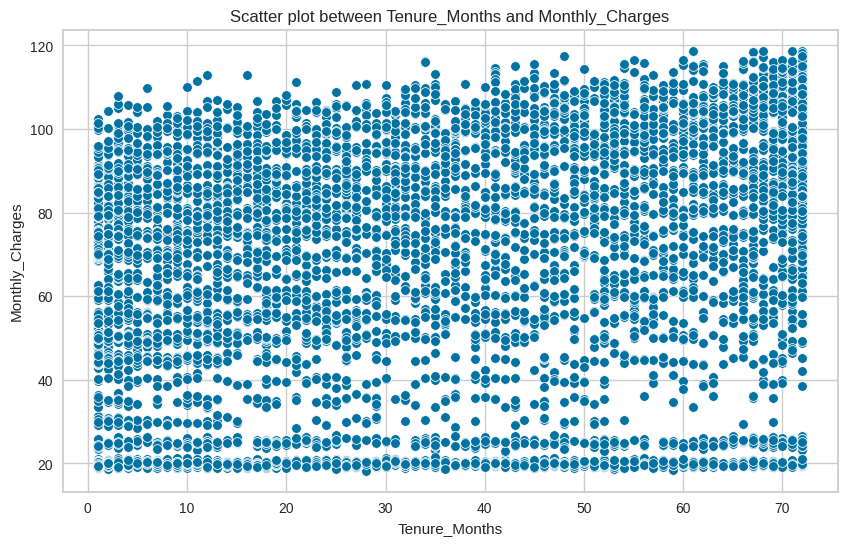

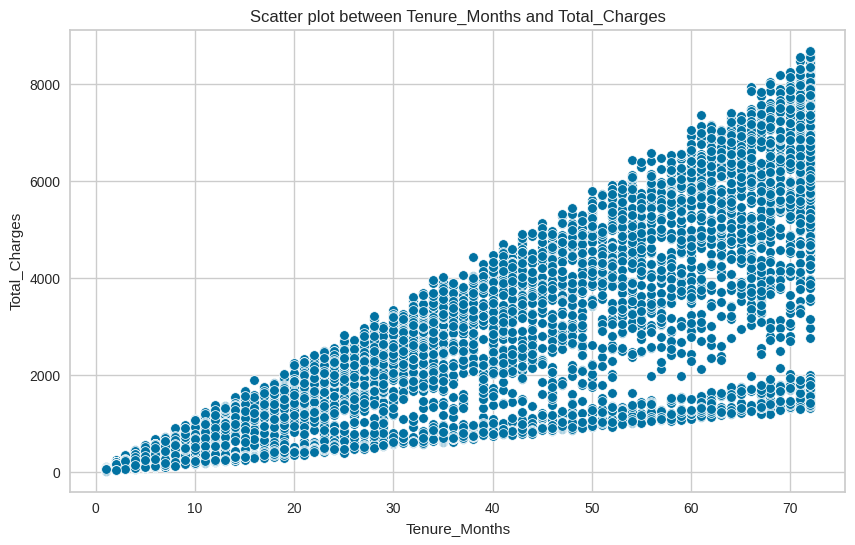

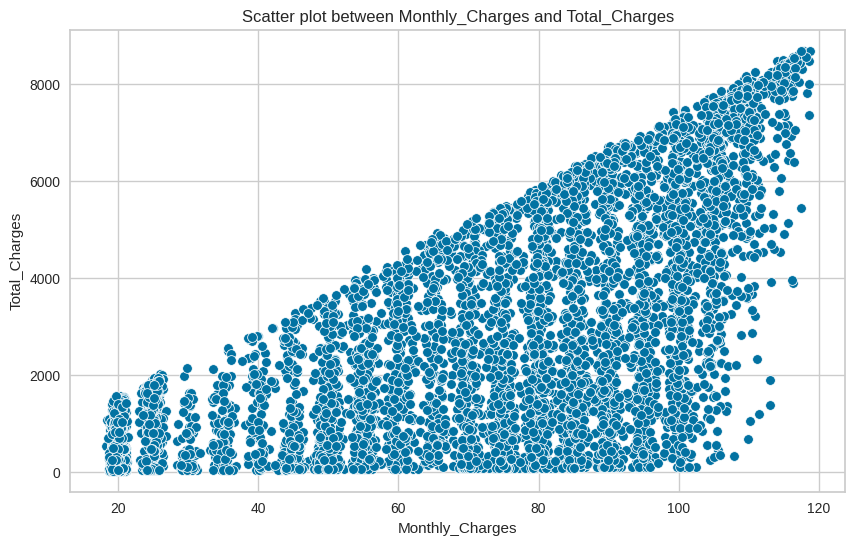

In [55]:
# Before making changes, it is also worth plotting the relationships between Tenure_Months, Monthly_Charges, and Total_Charges to understand how they interact

import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot between Tenure_Months and Monthly_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Tenure_Months', y='Monthly_Charges')
plt.title('Scatter plot between Tenure_Months and Monthly_Charges')
plt.show()

# Scatter plot between Tenure_Months and Total_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Tenure_Months', y='Total_Charges')
plt.title('Scatter plot between Tenure_Months and Total_Charges')
plt.show()

# Scatter plot between Monthly_Charges and Total_Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfpd, x='Monthly_Charges', y='Total_Charges')
plt.title('Scatter plot between Monthly_Charges and Total_Charges')
plt.show()



Since there isn't a strong linear trend visible in the scatter plot, Tenure_Months might not be a strong linear predictor of Monthly_Charges. The lack of a clear pattern suggests that other variables not included in this two-dimensional plot might interact with Tenure_Months to influence Monthly_Charges.

The scatter plot suggests that there is some degree of linear association between Tenure_Months and Total_Charges. This could be contributing to multicollinearity in your regression model.

Given that there’s a visible positive trend, it’s likely that Monthly_Charges and Total_Charges could introduce multicollinearity in a regression model if used together. This is consistent with the VIF values you obtained earlier, where Total_Charges had a high VIF.

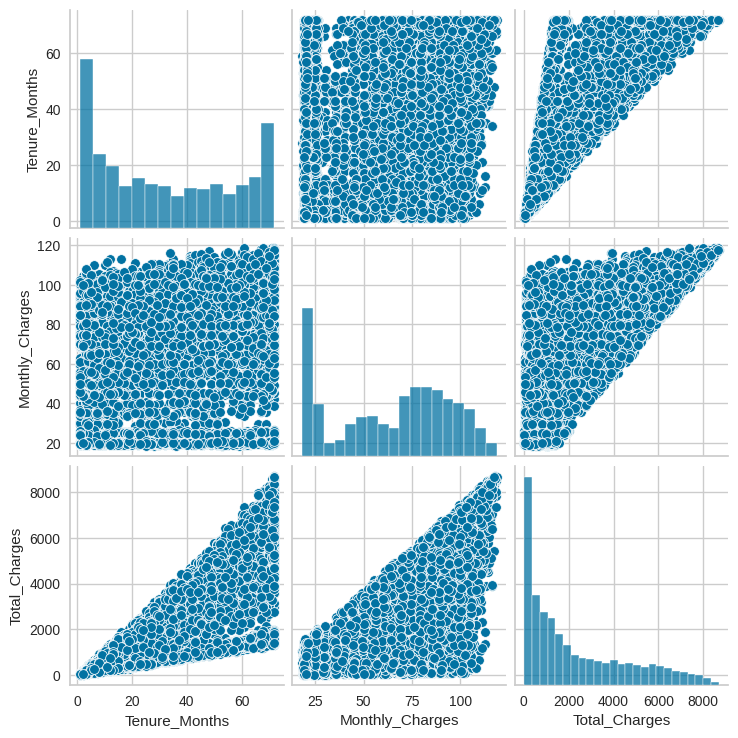

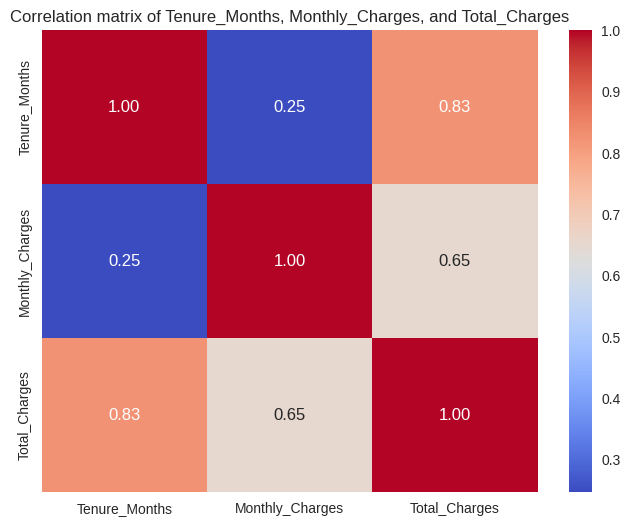

In [56]:
# Pairplot can be used to show all the relationships at once, including the distribution of each variable
sns.pairplot(data=dfpd, vars=['Tenure_Months', 'Monthly_Charges', 'Total_Charges'])
plt.show()

# Calculate and visualize the correlation matrix
correlation_matrix = dfpd[['Tenure_Months', 'Monthly_Charges', 'Total_Charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of Tenure_Months, Monthly_Charges, and Total_Charges')
plt.show()

In [57]:
import statsmodels.formula.api as smf

# Assuming 'dfpd' is your pandas DataFrame with the proper columns.
# Make sure to one-hot encode categorical variables as shown in the previous message if necessary.

# The formula for OLS needs to have variable names without spaces, or quoted if they contain spaces.

#Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'Churn_Score', 'CLTV'

results = smf.ols('Q("Churn_Value") ~ Q("Zip_Code") + Q("Latitude") + Q("Longitude") + Q("Tenure_Months") + Q("Monthly_Charges") + Q("Total_Charges") + Q("Churn_Score") + Q("CLTV")', data=dfpd).fit()

# View the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q("Churn_Value")   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     956.6
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:35:06   Log-Likelihood:                -1641.5
No. Observations:                7032   AIC:                             3301.
Df Residuals:                    7023   BIC:                             3363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6903      0.448     -1.542      0.123      -1.568       0.187
Q("Zip_Code")         2.475e-06    4.4e-06      0.563      0.574   -6.15e-06    1.11e-05
Q("Latitude")           -0.0004      0.004     -0.098      0.922      -0.009       0.008
Q("Longitude")           0.0007      0.004      0.200      0.841      -0.006       0.008
Q("Tenure_Months")      -0.0019      0.000     -5.264      0.000      -0.003      -0.001
Q("Monthly_Charges")     0.0043      0.000     19.578      0.000       0.004       0.005
Q("Total_Charges")   -4.628e-05   4.99e-06     -9.271      0.000   -5.61e-05   -3.65e-05
Q("Churn_Score")         0.0118      0.000     65.949      0.000       0.011       0.012
Q("CLTV")             4.539e-06   3.36e-06      1.349      0.177   -2.06e-06    1.11e-05
==============================================================================
Omnibus:                      431.045   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.207
Skew:                           0.047   Prob(JB):                     2.68e-35
Kurtosis:                       2.269   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Most variables have high p-values (greater than 0.05), indicating that many are not statistically significant predictors of the target variable, except for Total_Charges and CLTV.


In [58]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['Zip_Code','Latitude','Longitude'], axis=1)


In [59]:

dfpd1

Count  Tenure_Months  Monthly_Charges  Total_Charges  Churn_Value  \
0         1              2            53.85         108.15            1   
1         1              2            70.70         151.65            1   
2         1              8            99.65         820.50            1   
3         1             28           104.80        3046.05            1   
4         1             49           103.70        5036.30            1   
...     ...            ...              ...            ...          ...   
7038      1             72            21.15        1419.40            0   
7039      1             24            84.80        1990.50            0   
7040      1             72           103.20        7362.90            0   
7041      1             11            29.60         346.45            0   
7042      1             66           105.65        6844.50            0   

      Churn_Score  CLTV  
0              86  3239  
1              67  2701  
2              86  5372  
3              84  5003  
4              89  5340  
...           ...   ...  
7038           45  5306  
7039           59  2140  
7040           71  5560  
7041           59  2793  
7042           38  5097  

[7032 rows x 7 columns]

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [60]:
#Calculating correlation matrix for all variables
dfpd1.corr()


Count  Tenure_Months  Monthly_Charges  Total_Charges  \
Count              NaN            NaN              NaN            NaN   
Tenure_Months      NaN       1.000000         0.246862       0.825880   
Monthly_Charges    NaN       0.246862         1.000000       0.651065   
Total_Charges      NaN       0.825880         0.651065       1.000000   
Churn_Value        NaN      -0.354049         0.192858      -0.199484   
Churn_Score        NaN      -0.226379         0.133556      -0.124312   
CLTV               NaN       0.396188         0.098565       0.341837   

                 Churn_Value  Churn_Score      CLTV  
Count                    NaN          NaN       NaN  
Tenure_Months      -0.354049    -0.226379  0.396188  
Monthly_Charges     0.192858     0.133556  0.098565  
Total_Charges      -0.199484    -0.124312  0.341837  
Churn_Value         1.000000     0.664970 -0.128253  
Churn_Score         0.664970     1.000000 -0.080837  
CLTV               -0.128253    -0.080837  1.000000

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

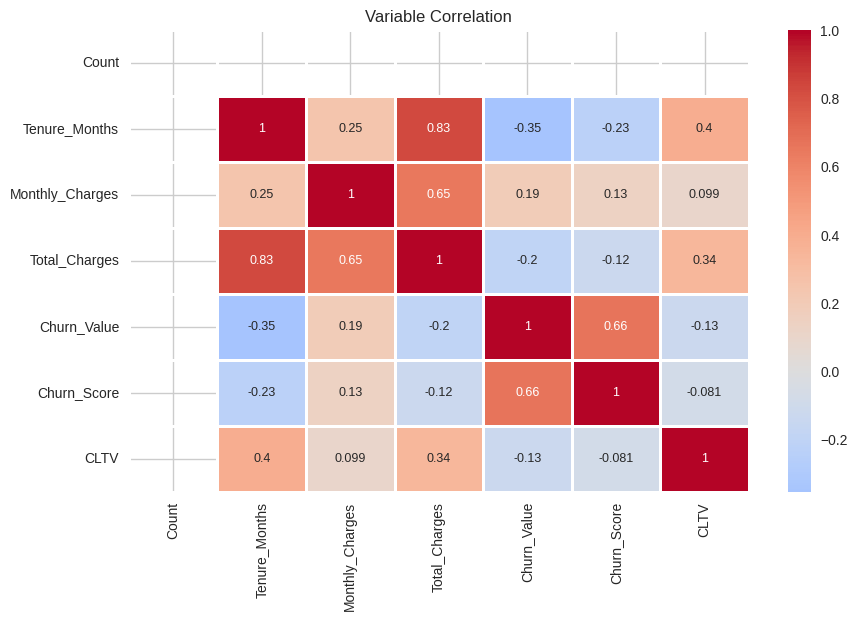

In [61]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Variables such as Tenure_Months, Monthly_Charges, and Total_Charges show moderate to strong correlations, which is expected as they are related to billing and customer tenure.
The variable Churn_Value shows meaningful correlations with variables like Tenure_Months and Churn_Score, which could be important considerations in understanding and predicting customer churn.

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

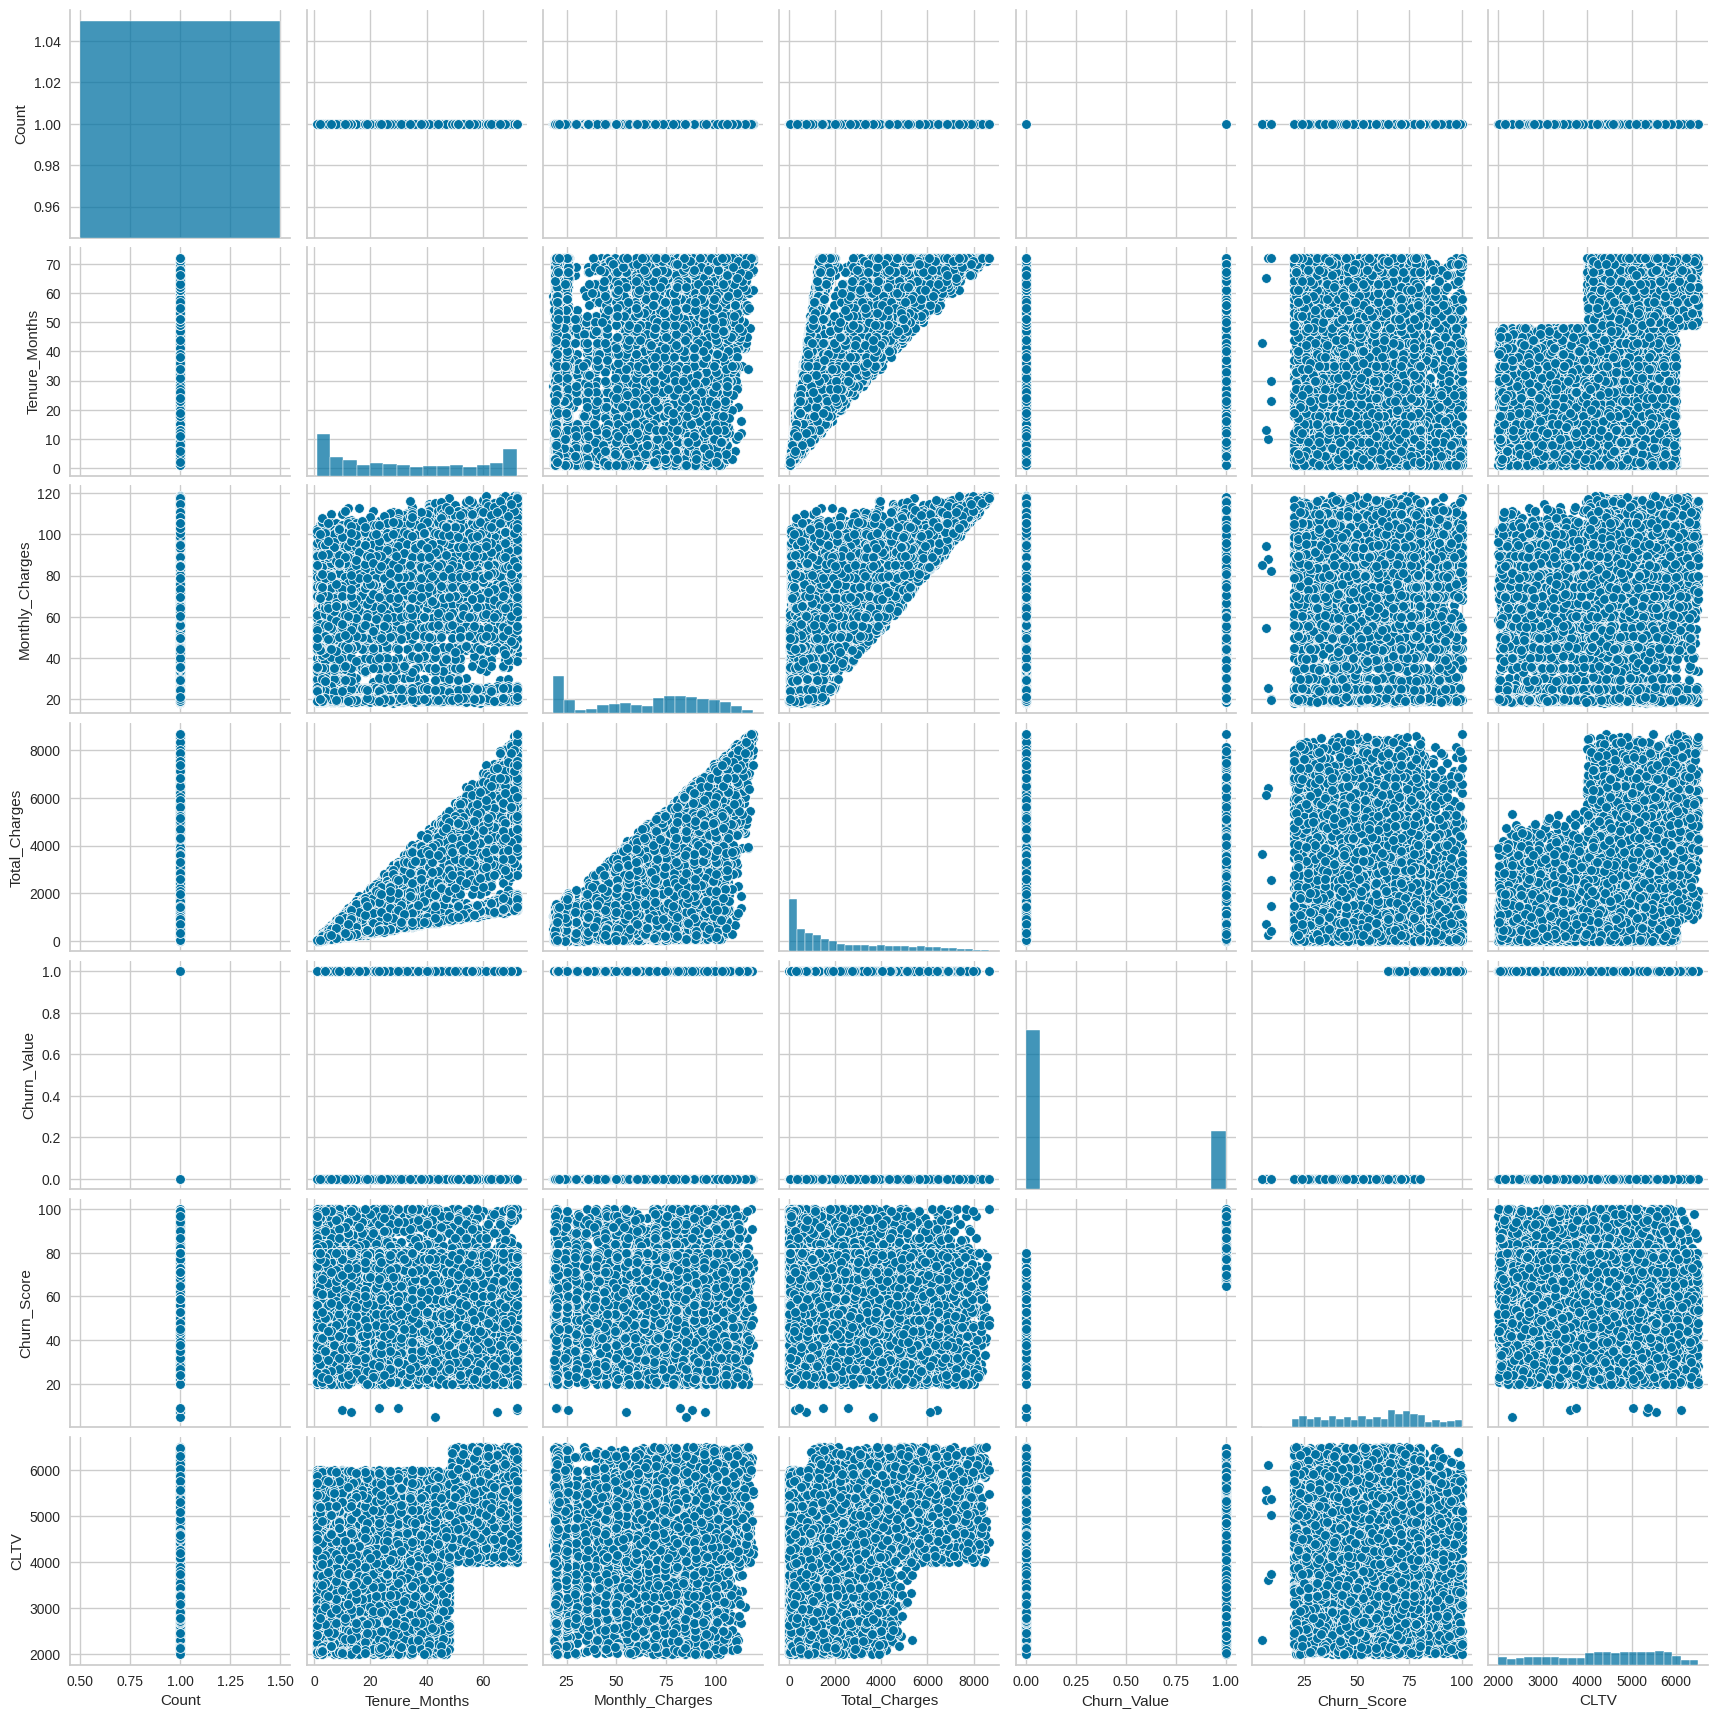

In [62]:
sns.pairplot(dfpd1)

# **H20 AutoML Rexecution on new model**

Dropping the variables that are not significant for determining Churn Value. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [66]:
df1 = df.drop(['Zip Code','Latitude','Longitude'], axis=1)

In [67]:
#df1_train, df1_test = df1.split_frame([pct_rows])
from sklearn.model_selection import train_test_split

# Define the proportion for the split. For example, 0.8 for 80% training data.
pct_rows = 0.8

# Split the DataFrame into training and test sets
df1_train, df1_test = train_test_split(df1, train_size=pct_rows)


In [83]:
X1 = df1.columns
X1_list = X1.tolist()
print(X1_list)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [84]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Churn Value'
# Now, you can remove 'Churn Value' from X1
X1_list.remove(y1_numeric)

# X1 should now contain all columns except 'Churn Value'
print(X1_list)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason']


In [85]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [87]:
# Make sure df1_train is converted to an H2OFrame
df1_train_h2o = h2o.H2OFrame(df1_train)

# Now you can call the train function on your H2O AutoML object
aml1.train(x=X1_list, y=y1_numeric, training_frame=df1_train_h2o)
#aml1.train(x = X1_list,y = y1_numeric,training_frame = df1_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:53:45.226: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:53:45.226: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
20:53:57.540: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:53:57.540: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█████
20:54:16.247: _train param, Dropping bad and constant columns: [Country, CustomerID, Count, State]
20:54:16.247: _response param, We have detected that your response column has only 2 unique values (0/1). If you

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20231102_205345_model_3


Model Summary: 
    number_of_trees
--  -----------------
    42

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 1.0673122448400355e-10
RMSE: 1.033108050902729e-05
MAE: 9.225430827840385e-06
RMSLE: 7.040633765803988e-06
Mean Residual Deviance: 1.0673122448400355e-10

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 2.1566127160366607e-10
RMSE: 1.4685410161233701e-05
MAE: 1.312665485588907e-05
RMSLE: 1.0024633222722734e-05
Mean Residual Deviance: 2.1566127160366607e-10

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.31266e-05  1.47238e-07  1.29607e-05   1.32125e-05   1.33279e-05   1.31106e-05   1.30215e-05
mean_residual_deviance  2.15661e-10  6.55172e-12  2.07362e-10   2.14081e-10   2.25631e-10   2.16292e-10   2.1494e-10
mse                     2.15661e-10  6.55172e-12  2.07362e-10   2.14081e-10   2.25631e-10   2.16292e-10   2.1494e-10
r2                      1            0            1             1             1             1             1
residual_deviance       2.15661e-10  6.55172e-12  2.07362e-10   2.14081e-10   2.25631e-10   2.16292e-10   2.1494e-10
rmse                    1.46841e-05  2.22501e-07  1.44001e-05   1.46315e-05   1.5021e-05    1.47069e-05   1.46608e-05
rmsle                   1.00242e-05  1.05527e-07  1.00644e-05   1.01795e-05   9.99315e-06   9.98831e-06   9.8955e-06

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-02 20:57:07  14.920 sec  0                  0.5              0.5             0.25
    2023-11-02 20:57:07  15.083 sec  5                  0.0840417        0.0840417       0.007063
    2023-11-02 20:57:07  15.139 sec  10                 0.0141263        0.0141263       0.000199551
    2023-11-02 20:57:07  15.210 sec  15                 0.00237468       0.00237468      5.63909e-06
    2023-11-02 20:57:07  15.294 sec  20                 0.000399428      0.000399428     1.59543e-07
    2023-11-02 20:57:07  15.388 sec  25                 6.74333e-05      6.7433e-05      4.54725e-09
    2023-11-02 20:57:07  15.513 sec  30                 1.16231e-05      1.16217e-05     1.35097e-10
    2023-11-02 20:57:07  15.637 sec  35                 1.03894e-05      9.60604e-06     1.0794e-10
    2023-11-02 20:57:07  15.758 sec  40                 1.03384e-05      9.26258e-06     1.06882e-10
    2023-11-02 20:57:07  15.813 sec  42                 1.03311e-05      9.22543e-06     1.06731e-10

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
Churn Reason.nan  2147.06                1                    1

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [88]:
print(aml1.leaderboard)

model_id                                                        rmse          mse          mae        rmsle    mean_residual_deviance
XGBoost_grid_1_AutoML_1_20231102_205345_model_3          1.46854e-05  2.15661e-10  1.31267e-05  1.00246e-05               2.15661e-10
GBM_4_AutoML_1_20231102_205345                           1.63349e-05  2.66828e-10  9.17116e-06  1.23439e-05               2.66828e-10
XGBoost_2_AutoML_1_20231102_205345                       2.19566e-05  4.82094e-10  1.29672e-05  1.32313e-05               4.82094e-10
XGBoost_3_AutoML_1_20231102_205345                       3.0435e-05   9.2629e-10   1.49864e-05  2.28728e-05               9.2629e-10
XGBoost_grid_1_AutoML_1_20231102_205345_model_2          0.000185031  3.42364e-08  7.89054e-05  0.000120168               3.42364e-08
StackedEnsemble_AllModels_2_AutoML_1_20231102_205345     0.000556867  3.10101e-07  0.000490603  0.000372542               3.10101e-07
StackedEnsemble_AllModels_1_AutoML_1_20231102_205345     0.0005

In [89]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict


{'XGBoost_grid_1_AutoML_1_20231102_205345_model_3': 0,
 'GLM_1_AutoML_1_20231102_205345': 16}

In [90]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [91]:

best_model1.algo

'xgboost'

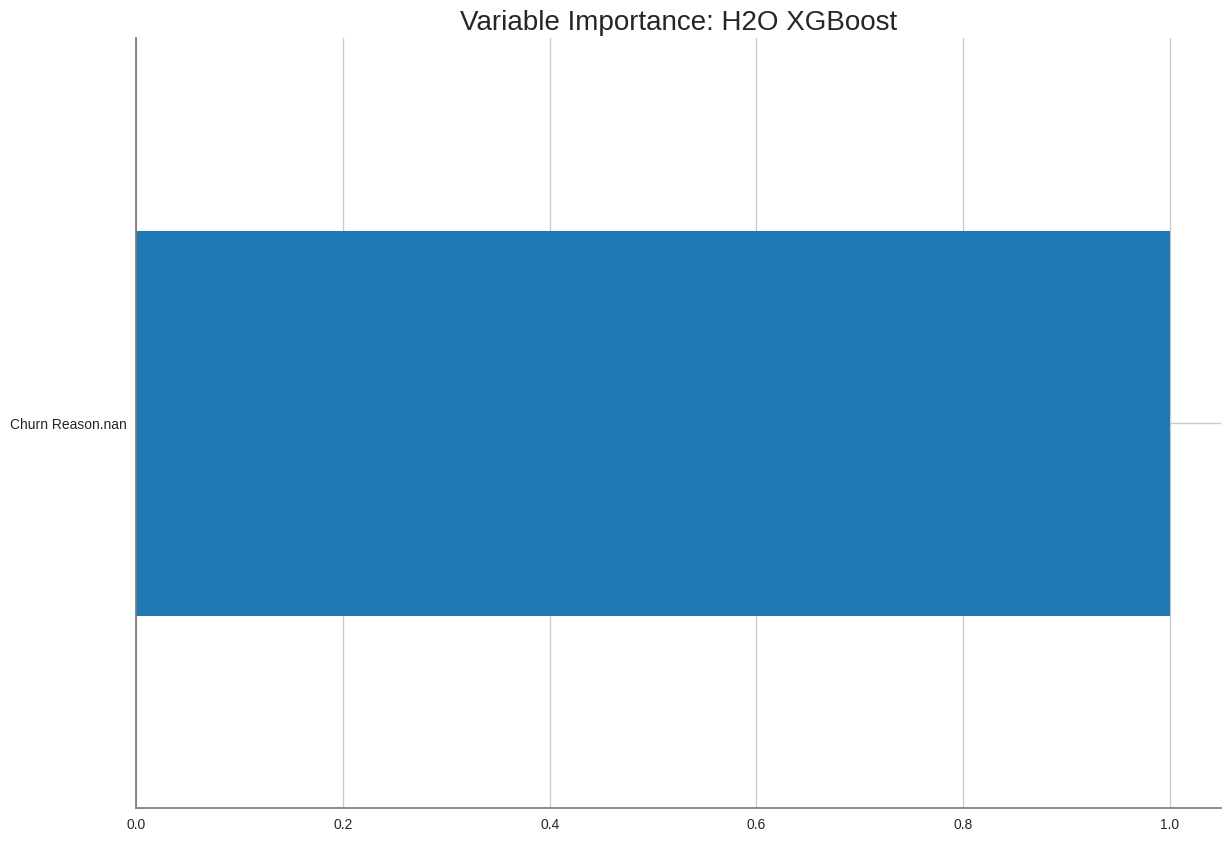

<Figure size 800x550 with 0 Axes>

In [92]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

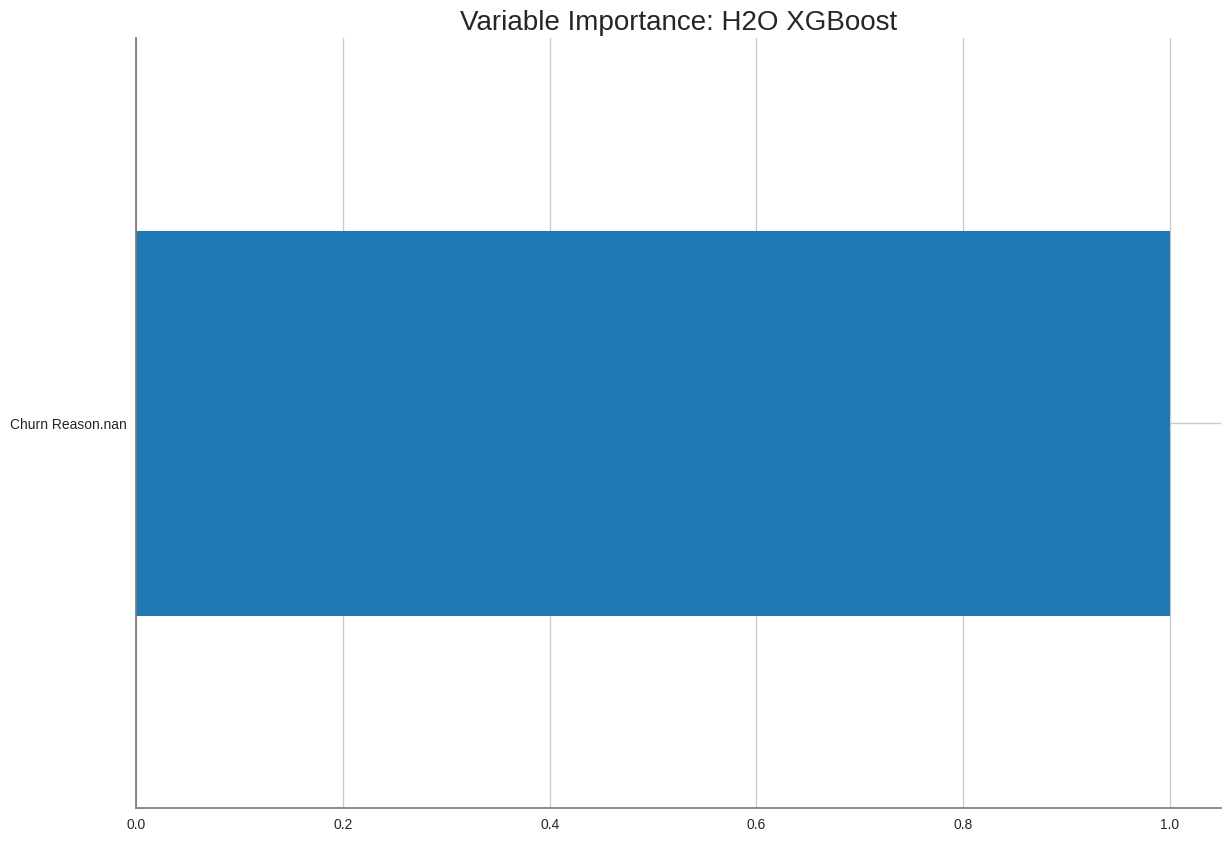

<Figure size 800x550 with 0 Axes>

In [100]:
#Assuming best_model1 is your trained H2O model
if best_model1.algo in ['gbm', 'drf', 'xrt', 'xgboost']:
    num_of_features_to_show = len(best_model1.varimp())
    best_model1.varimp_plot(num_of_features=num_of_features_to_show)

16
glm


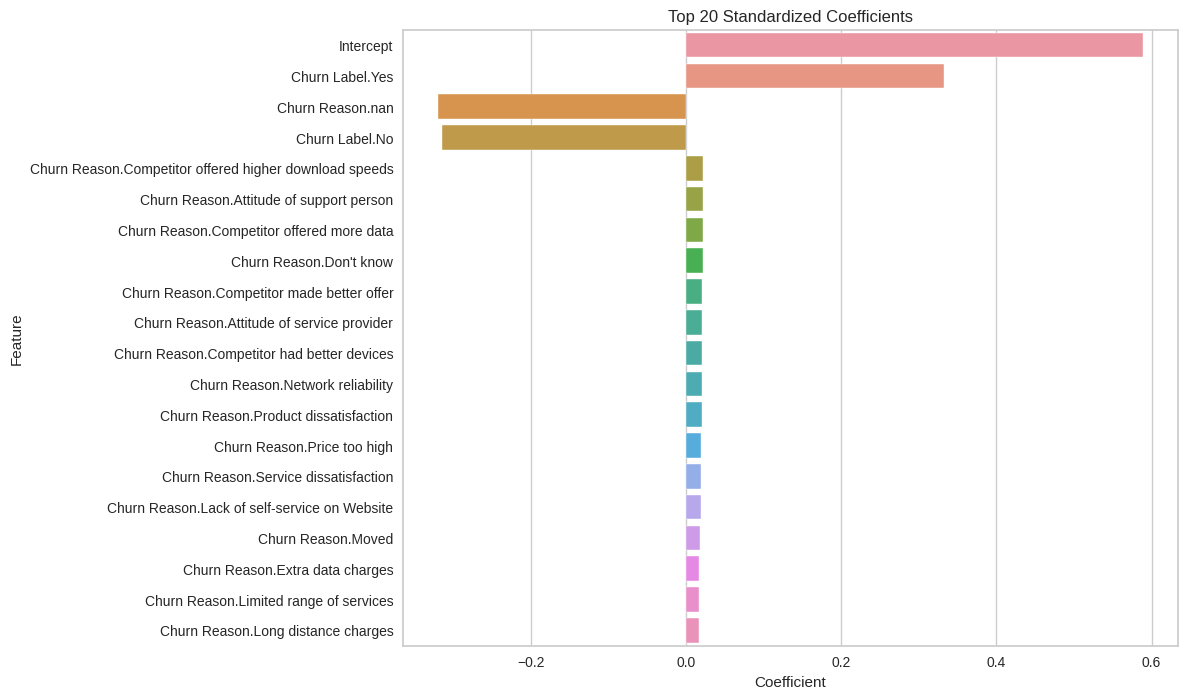

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

if glm_index != 0:
    print(glm_index)
    glm_model1 = h2o.get_model(aml1.leaderboard[glm_index, 'model_id'])
    print(glm_model1.algo)

    # Getting standardized coefficients
    coef = glm_model1.coef_norm()

    # Sorting coefficients by magnitude
    sorted_coef = sorted(coef.items(), key=lambda x: abs(x[1]), reverse=True)

    # Converting to DataFrame
    coef_df = pd.DataFrame(sorted_coef, columns=['Feature', 'Coefficient'])

    # Displaying only the top 20 coefficients
    coef_df = coef_df.head(20)

    # Creating a bar plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Top 20 Standardized Coefficients')
    plt.show()

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

1. There needs to be linear relation between the independent and dependent variable.

2. Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

3. Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

4. There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [96]:
#Seperating the predictor and target variables
A=dfpd1.drop(['Churn_Value'],axis=1)
B=dfpd1['Churn_Value']


In [97]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [108]:
cols1 = ['Count','Tenure_Months', 'Monthly_Charges', 'Total_Charges','Churn_Score', 'CLTV']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [109]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))


In [110]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -9.53074656232881e-16


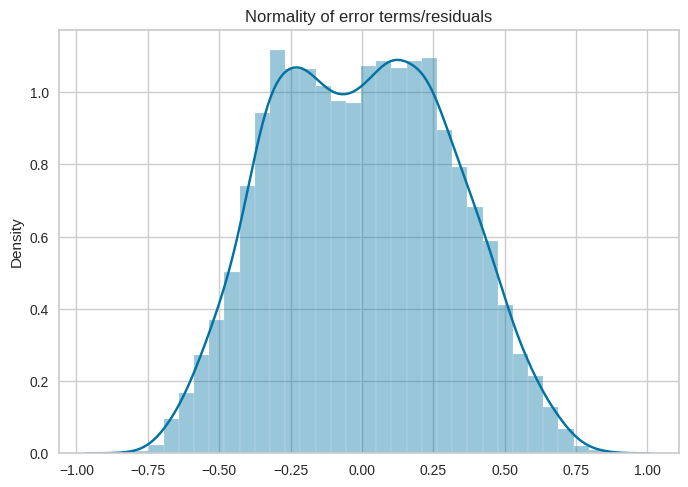

In [111]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residuals represent the difference between the actual values and the values predicted by the model.

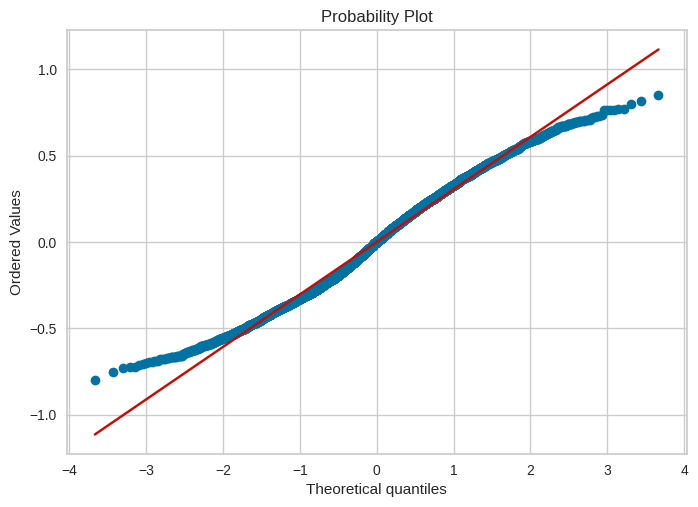

In [112]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Churn_Value', ylabel='Count'>

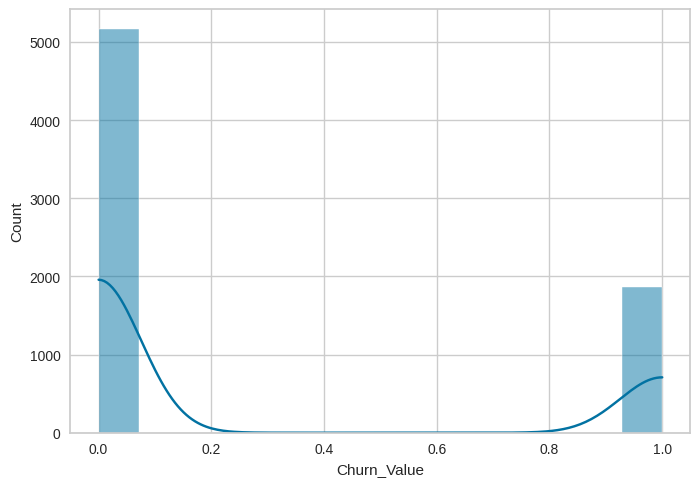

In [122]:
sns.histplot(dfpd.Churn_Value, kde = True)

Most values are concentrated around 0, suggesting that there are fewer instances of Churn Value = 1 in your dataset. This indicates that the data might be imbalanced with fewer churn cases.

# Ridge Regularization in H20

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [126]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
telco_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
telco_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [127]:
# Convert the pandas DataFrame to an H2OFrame
df1_train_h2o = h2o.H2OFrame(df1_train)

# Now, you can train your model using the H2OFrame
telco_glm_regularization.train(x=X1_list, y=y1_numeric, training_frame=df1_train_h2o)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698958247197_21


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.001 )  2846                          2846                           1                       Key_Frame__upload_9d57fef66b36b8d47268032601e54e60.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.522115132049303e-06
RMSE: 0.0012337403017042537
MAE: 0.0009578998176008059
RMSLE: 0.0009846007746698426
Mean Residual Deviance: 1.522115132049303e-06
R^2: 0.9999921684277324
Null degrees of freedom: 5633
Residual degrees of freedom: 2787
Null deviance: 1095.0031948881083
Residual deviance: 0.008575596653965773
AIC: -53785.13861059696

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse          training_deviance      training_mae           training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ---------------------  ---------------------  ---------------------  ------------------
    2023-11-02 21:43:24  0.000 sec   0             1095.003194888142          0.19435626462338337
    2023-11-02 21:43:24  2.090 sec   1                                                             0.0012337403017042537  1.522115132049303e-06  0.0009578998176008059  0.9999921684277324

Variable Importances: 
variable                                                relative_importance     scaled_importance       percentage
------------------------------------------------------  ----------------------  ----------------------  ----------------------
Churn Reason.nan                                        0.3260766565799713      1.0                     0.18309886260952243
Churn Label.No                                          0.3260766565799713      1.0                     0.18309886260952243
Churn Label.Yes                                         0.3260766565799713      1.0                     0.18309886260952243
Churn Reason.Competitor offered higher download speeds  0.018097229301929474    0.05549992290690417     0.010161972759170333
Churn Reason.Attitude of support person                 0.018080200999975204    0.05544770113140859     0.010152411011473642
Churn Reason.Competitor offered more data               0.01800987496972084     0.05523202782626625     0.010112921474606844
Churn Reason.Don't know                                 0.017891431227326393    0.05486878887614718     0.010046412835984564
Churn Reason.Competitor made better offer               0.017781386151909828    0.05453130665165811     0.009984620224529686
Churn Reason.Competitor had better devices              0.017764432355761528    0.05447931336785142     0.009975100313401345
Churn Reason.Attitude of service provider               0.017696460708975792    0.05427086040007798     0.00993693281209445
---                                                     ---                     ---                     ---
Lat Long.40.845738, -120.322219                         2.0039719856868032e-06  6.145708210778722e-06   1.1252721833235872e-06
City.Ravendale                                          2.0039719856868032e-06  6.145708210778722e-06   1.1252721833235872e-06
Lat Long.32.578103, -117.012975                         1.1707888916134834e-06  3.5905326799324065e-06  6.574224498579441e-07
Lat Long.37.410567, -122.297152                         8.447911454823043e-07   2.5907746796192895e-06  4.743678971158418e-07
Lat Long.37.497915, -122.267361                         8.141476541823067e-07   2.4967983379166995e-06  4.5716093

In [133]:
#Model details without regularization

df1_train_h2o = h2o.H2OFrame(df1_train)

house_glm = H2OGeneralizedLinearEstimator(remove_collinear_columns=True,
                                          # other parameters
                                         )

house_glm.train(x=X1_list, y=y1_numeric, training_frame=df1_train_h2o)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698958247197_24


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.05834 )  2846                          10                             1                       Key_Frame__upload_929ed5999e40ca80b86f684c4e7d4649.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.730302208705961e-29
RMSE: 5.225229381286491e-15
MAE: 4.1941167534991915e-15
RMSLE: 4.996681662207138e-15
Mean Residual Deviance: 2.730302208705961e-29
R^2: 1.0
Null degrees of freedom: 5633
Residual degrees of freedom: 5623
Null deviance: 1095.0031948881083
Residual deviance: 1.5382522643849383e-25
AIC: -354538.70970101183

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse          training_deviance      training_mae            training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ---------------------  ---------------------  ----------------------  -------------
    2023-11-02 21:50:17  0.000 sec   0             1095.003194888142          0.19435626462338337
    2023-11-02 21:50:17  0.039 sec   1                                                             5.225229381286491e-15  2.730302208705961e-29  4.1941167534991915e-15  1.0

Variable Importances: 
variable                         relative_importance     scaled_importance       percentage
-------------------------------  ----------------------  ----------------------  ----------------------
Churn Reason.nan                 1.0                     1.0                     0.9999999999999705
Total Charges                    7.801414848602074e-15   7.801414848602074e-15   7.801414848601843e-15
Tenure Months                    7.66052362332053e-15    7.66052362332053e-15    7.660523623320304e-15
Churn Score                      5.632606892431698e-15   5.632606892431698e-15   5.632606892431532e-15
Monthly Charges                  3.431990096234845e-15   3.431990096234845e-15   3.4319900962347436e-15
Contract.Month-to-month          3.3547523381482775e-15  3.3547523381482775e-15  3.3547523381481785e-15
Online Security.No               6.061375711485654e-16   6.061375711485654e-16   6.061375711485474e-16
Internet Service.Fiber optic     5.94322785023348e-16    5.94322785023348e-16    5.943227850233304e-16
Tech Support.No                  3.976861244912915e-16   3.976861244912915e-16   3.9768612449127974e-16
Payment Method.Electronic check  1.800019392996069e-16   1.800019392996069e-16   1.8000193929960157e-16
---                              ---                     ---                     ---
Dependents.Yes                   0.0                     0.0                     0.0
Paperless Billing.No             0.0                     0.0                     0.0
Paperless Billing.Yes            0.0                     0.0                     0.0
Phone Service.No                 0.0                     0.0                     0.0
Phone Service.Yes                0.0                     0.0                     0.0
Churn Label.No                   0.0                     0.0                     0.0
Churn Label.Yes                  0.0                     0.0                     0.0
Gender.Female                    0.0                     0.0                     0.0
Gender.Male                      0.0                     0.0                     0.0
CLTV                             0.0                     0.0                     0.0
[2846 rows x 4 column

The model with regularization seems more reasonable, given that it doesn’t fit the training data too perfectly, which might help in generalizing well to unseen data.

The model without regularization seems to overfit the training data, giving too much importance to specific patterns in the training data. It might not perform as well on new, unseen data because it might have fit the noise in the training data as well.

Given these results, I want to consider using the model with regularization for predictions, as it might generalize better to new data.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                        rmse          mse          mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  -----------  -----------  -----------  -----------  ------------------------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20231102_205345                           0            0            0            0                         0                           435                   0.014985  DRF
XGBoost_grid_1_AutoML_1_20231102_205345_model_3          1.04061e-05  1.08286e-10  9.29182e-06  7.05433e-06               1.08286e-10                 904                   0.007997  XGBoost
GBM_4_AutoML_1_20231102_205345                           1.36906e-05  1.87433e-10  7.84235e-06  1.06457e-05               1.87433e-10                4109                   0.094519  GBM
XGBoost_3_AutoML_1_20231102_205345                       1.44306e-05  2.08241e-10  1.27021e-05  9.5866e-06                2.08241e-10                 553                   0.003721  XGBoost
XGBoost_1_AutoML_1_20231102_205345                       1.44855e-05  2.09831e-10  1.26831e-05  9.68931e-06               2.09831e-10                1207                   0.006892  XGBoost
XGBoost_grid_1_AutoML_1_20231102_205345_model_2          7.87132e-05  6.19577e-09  5.02723e-05  5.08664e-05               6.19577e-09                 868                   0.005094  XGBoost
GBM_5_AutoML_1_20231102_205345                           0.00084249   7.09789e-07  0.000310825  0.000588456               7.09789e-07                1742                   0.071385  GBM
XGBoost_grid_1_AutoML_1_20231102_205345_model_1          0.000843551  7.11579e-07  0.000571033  0.000520111               7.11579e-07                 689                   0.004221  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20231102_205345  0.00102196   1.0444e-06   0.00064998   0.000732125               1.0444e-06                  995                   0.294132  StackedEnsemble
GBM_1_AutoML_1_20231102_205345                           0.00125876   1.58447e-06  0.000769221  0.00093125                1.58447e-06                6415                   0.068062  GBM
StackedEnsemble_AllModels_2_AutoML_1_20231102_205345     0.00342793   1.17507e-05  0.00151916   0.00207744                1.17507e-05                 578                   0.08992   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20231102_205345     0.00342806   1.17516e-05  0.0015192    0.00207763                1.17516e-05                1698                   0.147368  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20231102_205345  0.00342866   1.17557e-05  0.0015203    0.00207832                1.17557e-05                 773                   0.128059  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20231102_205345  0.00342957   1.17619e-05  0.00151974   0.00207865                1.17619e-05                1287                   0.139843  StackedEnsemble
GLM_1_AutoML_1_20231102_205345                           0.00379631   1.4412e-05   0.00300132   0.00307672                1.4412e-05                 1906                   0.003577  GLM
GBM_2_AutoML_1_20231102_205345                           0.0045775    2.09535e-05  0.00268884   0.00367724                2.09535e-05                2305                   0.066506  GBM
DeepLearning_1_AutoML_1_20231102_205345                  0.0049333    2.43374e-05  0.00402676   0.00357391                2.43374e-05                3303                   0.098552  DeepLearning
GBM_3_AutoML_1_20231102_205345                           0.00939464   8.82592e-05  0.00382656   0.00732193                8.82592e-05                2576                   0.041837  GBM
XGBoost_2_AutoML_1_20231102_205345                       0.0132505    0.000175576  0.00550517   0.00798286                0.000175576                3953                   0.0124

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

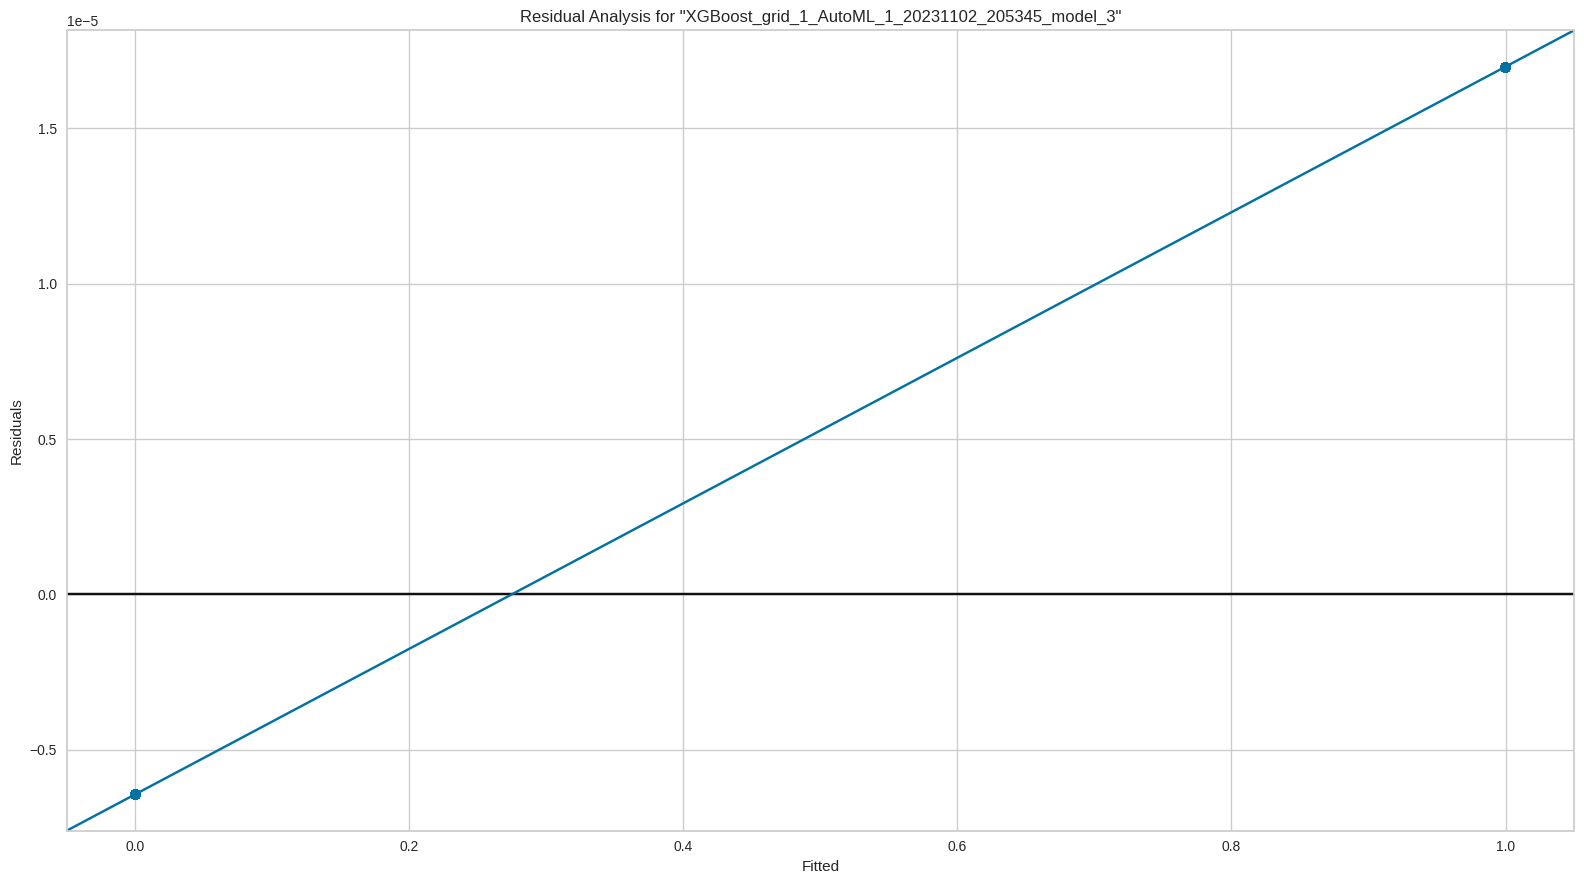

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

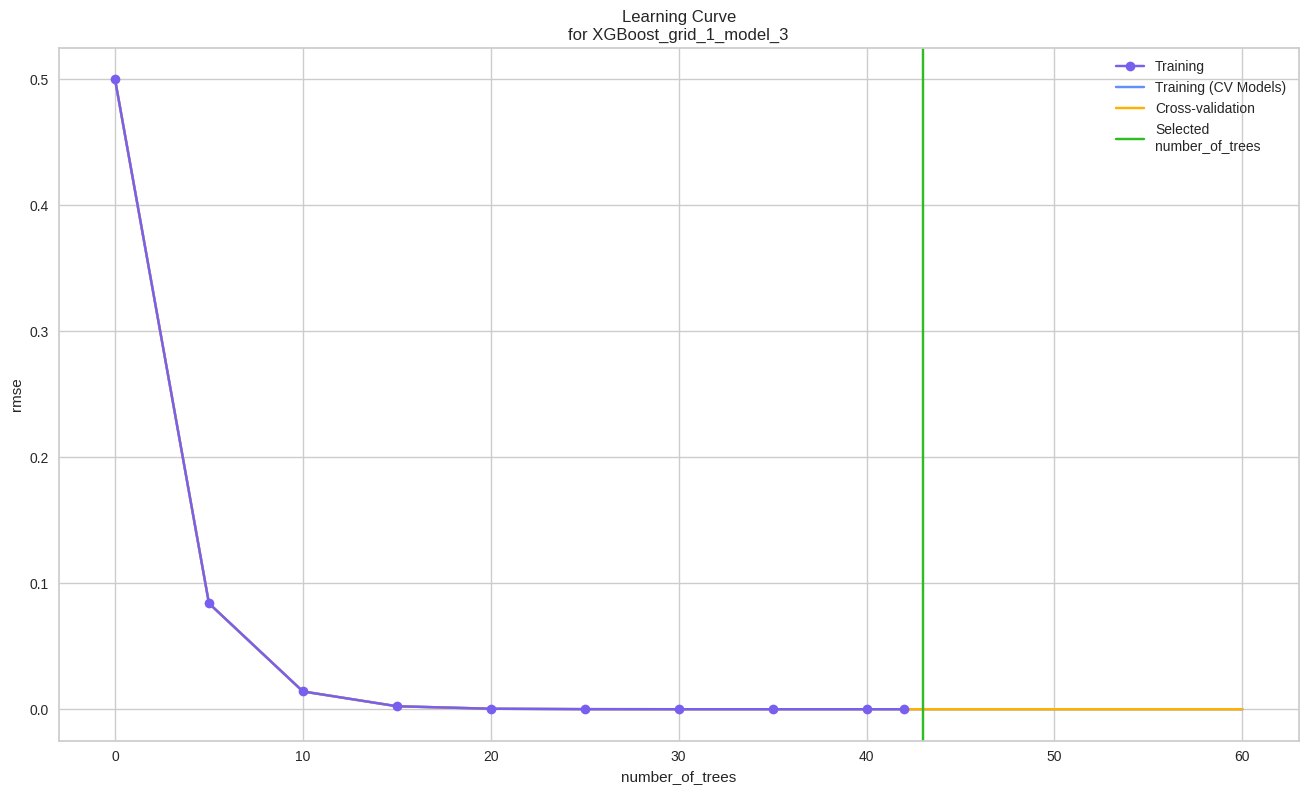

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

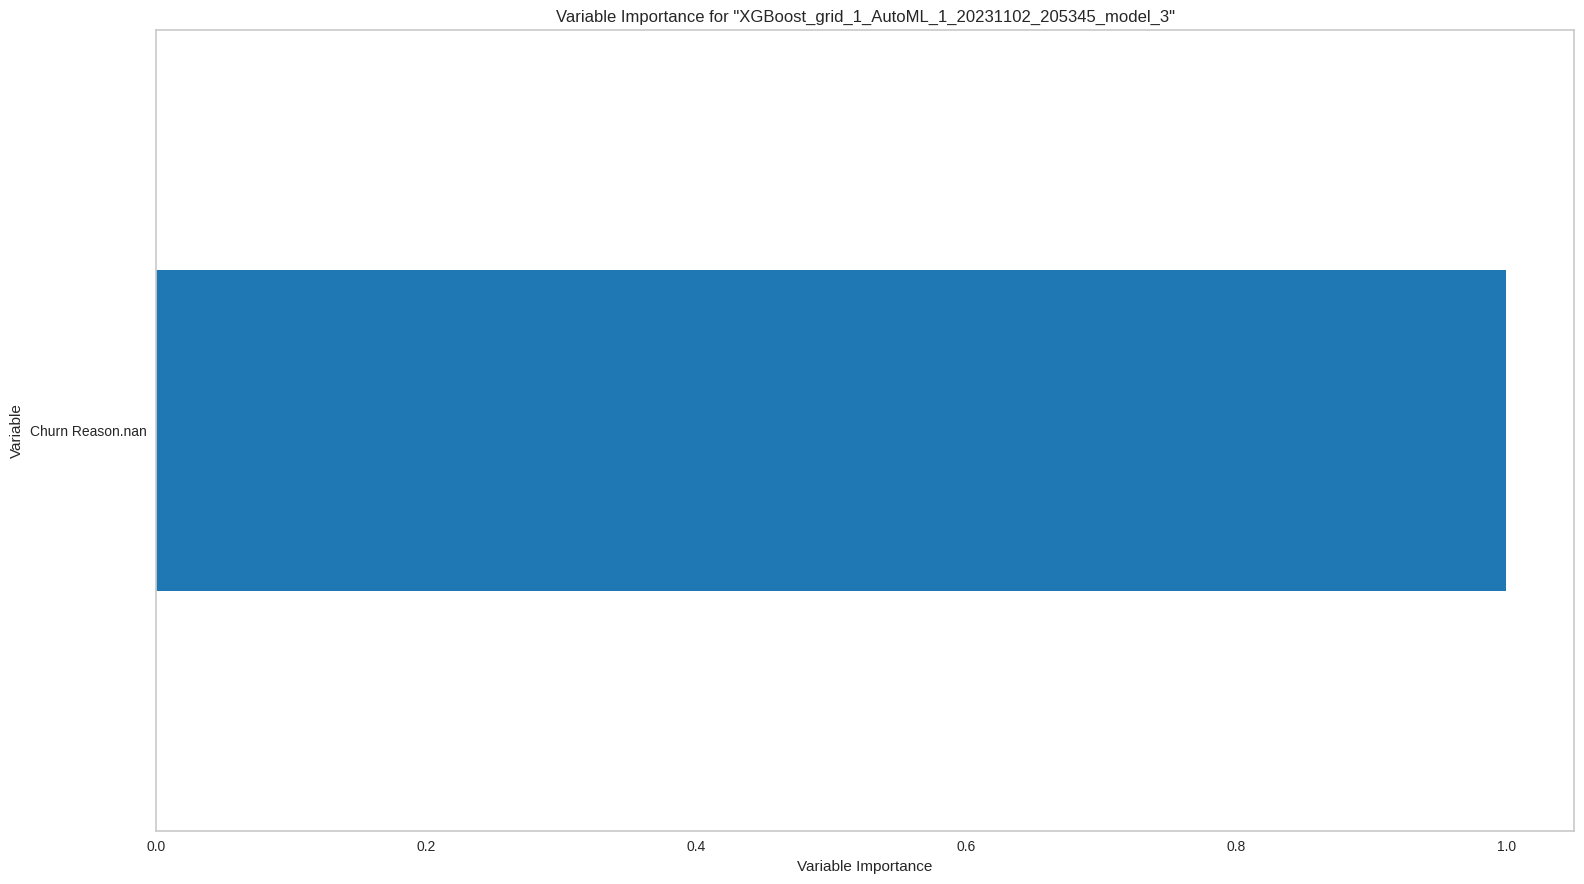

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

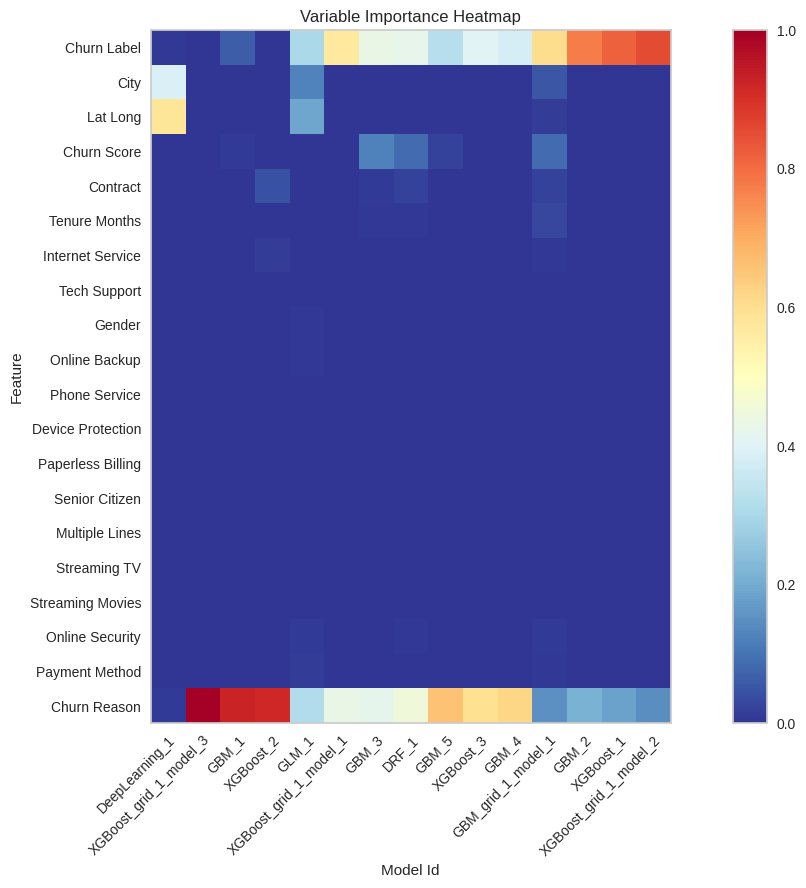

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

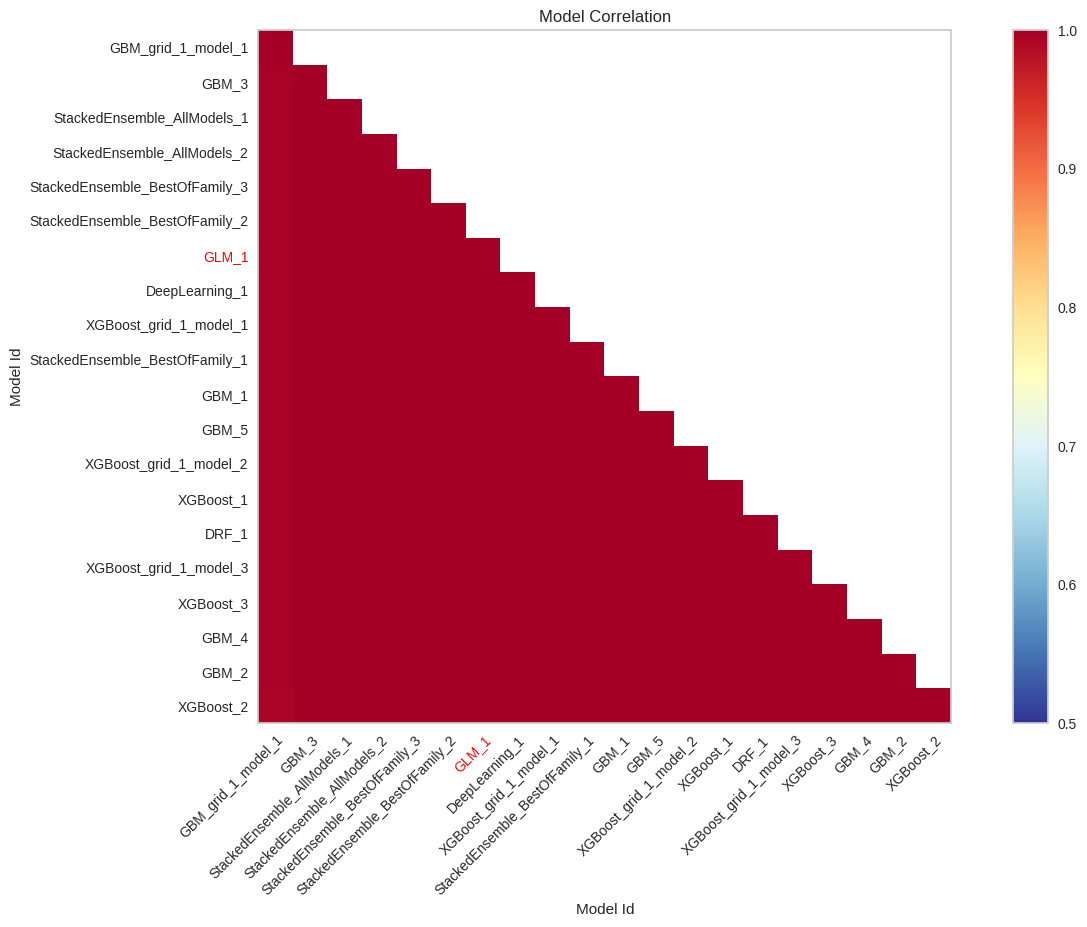

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

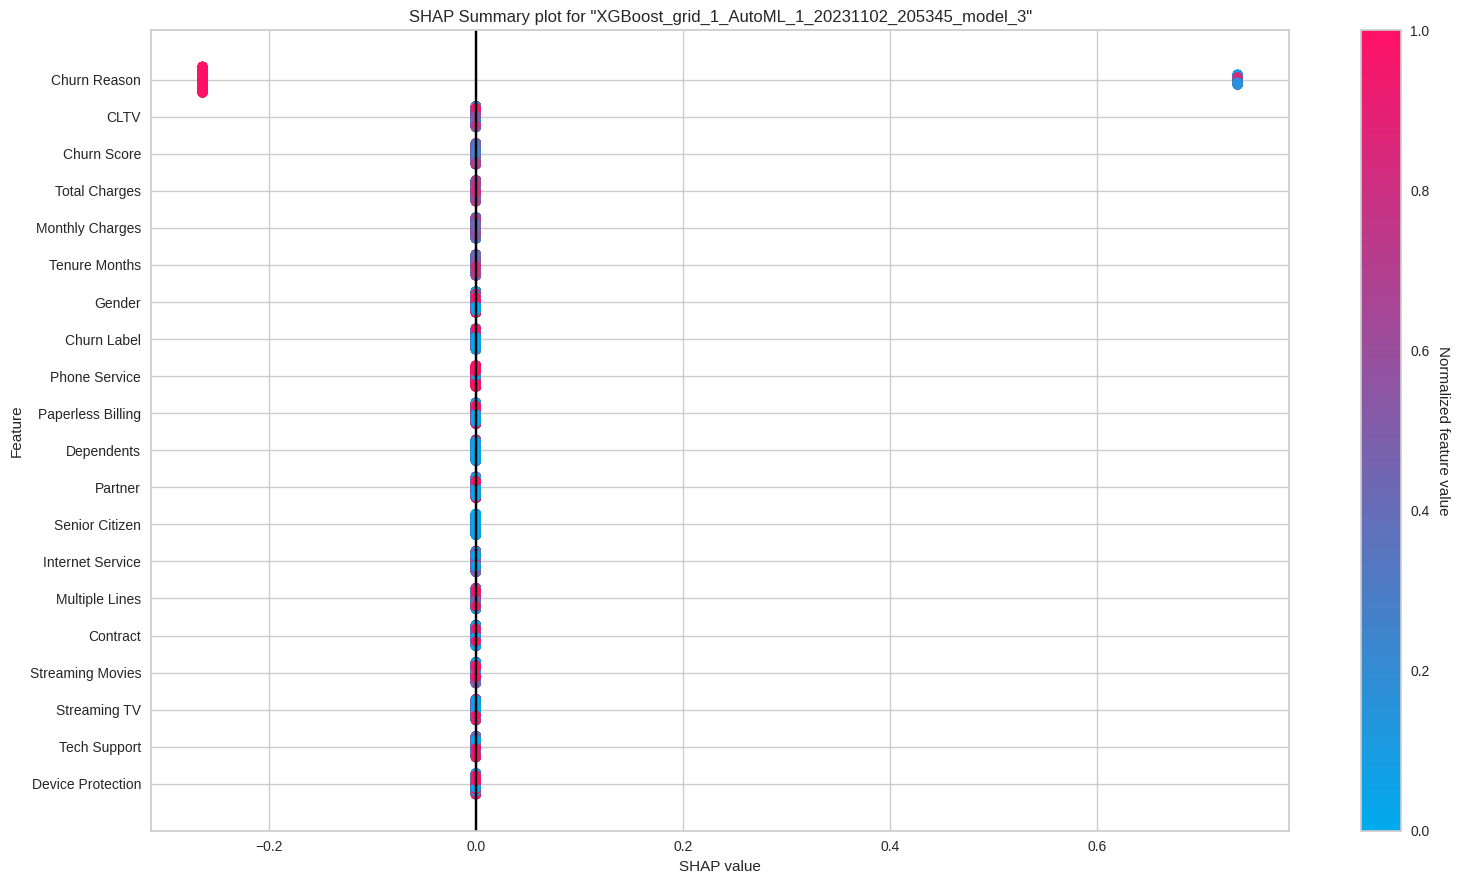

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

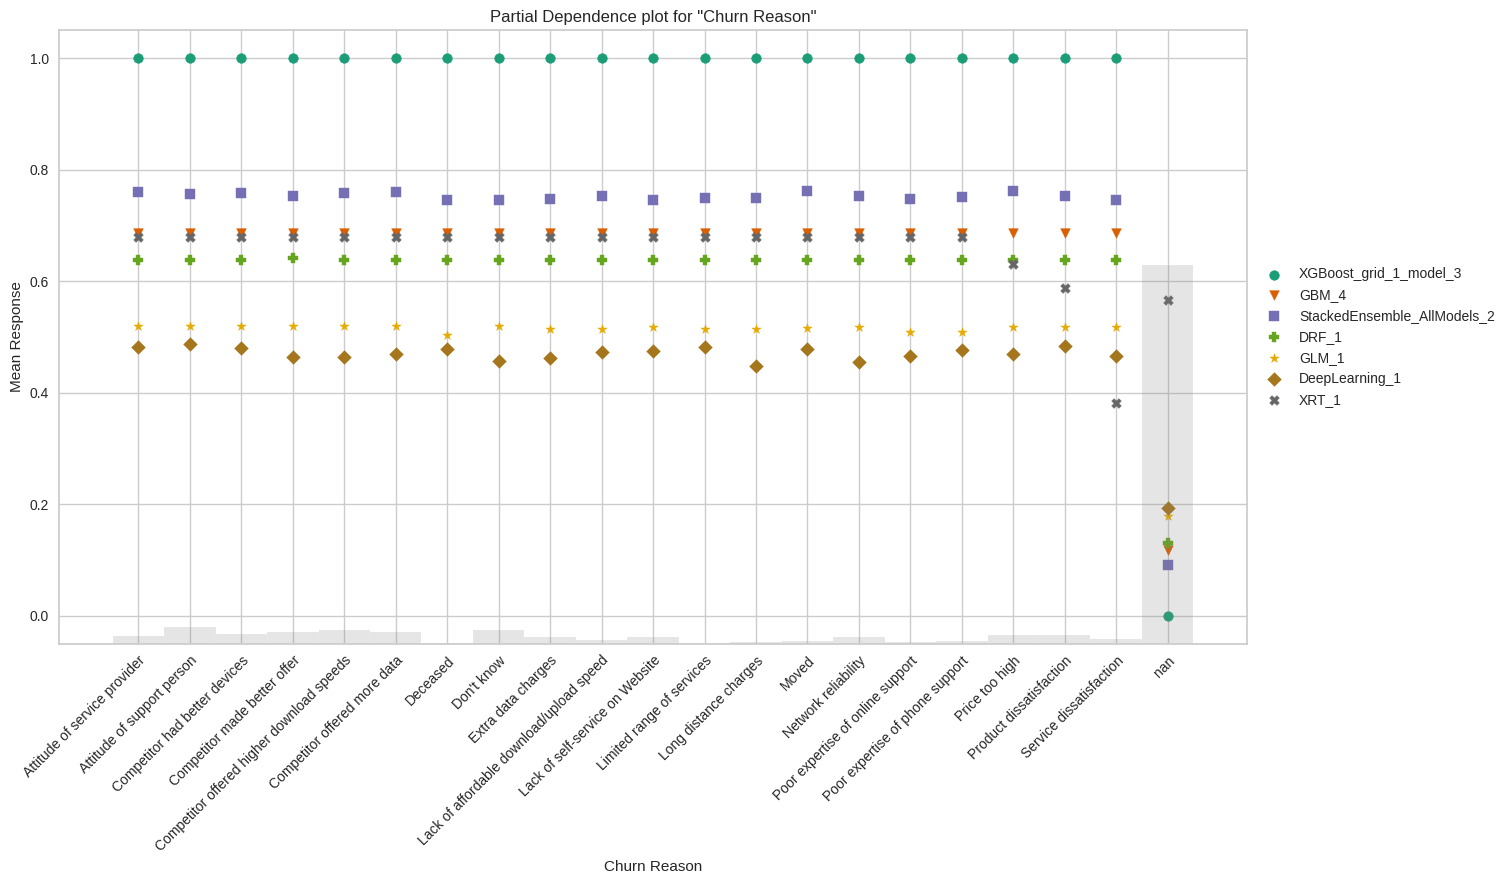

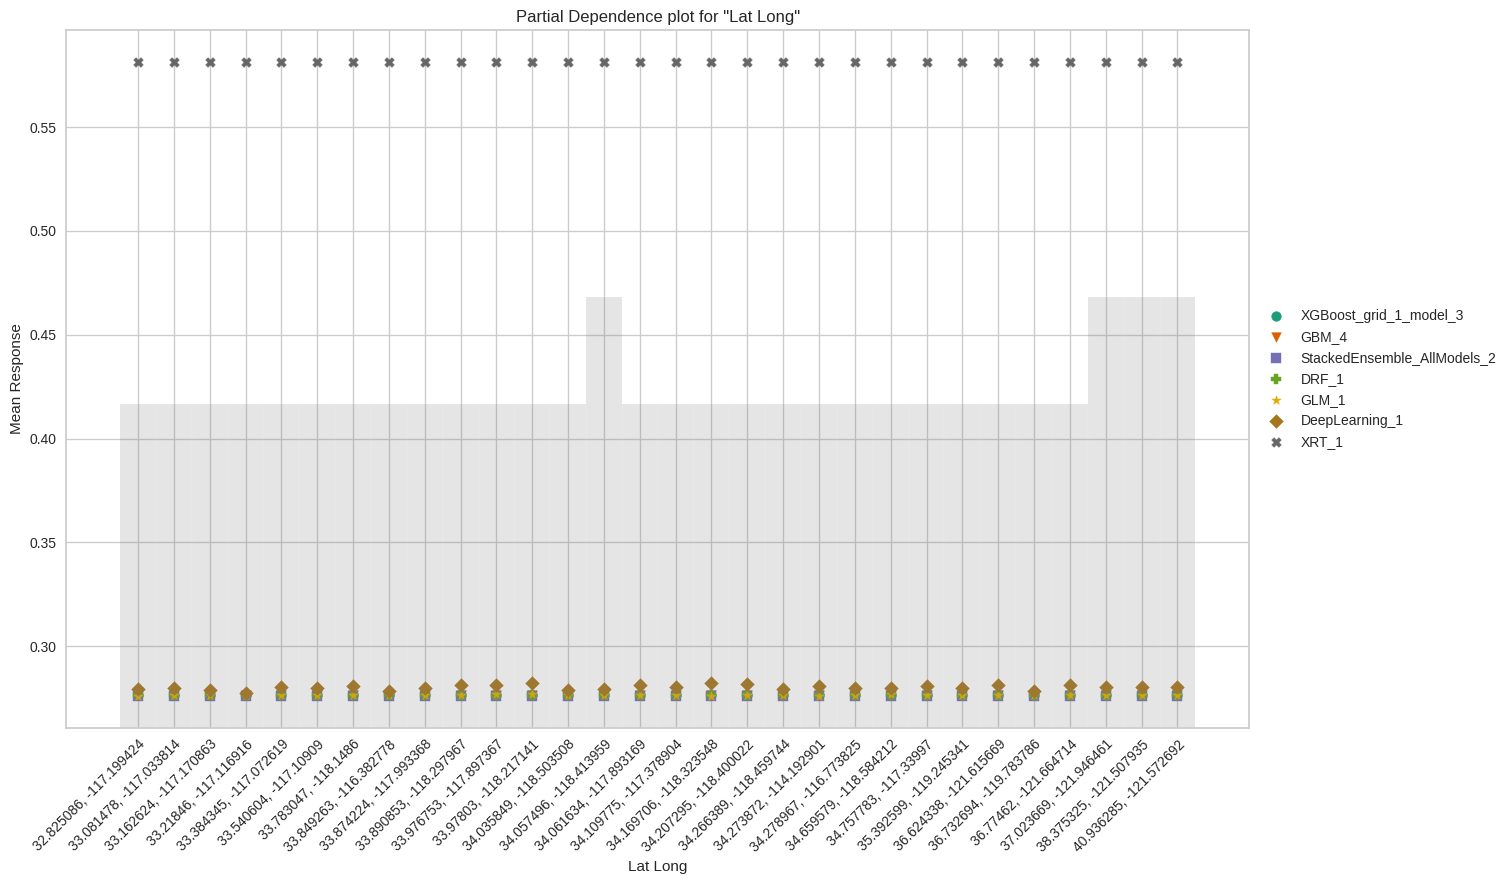

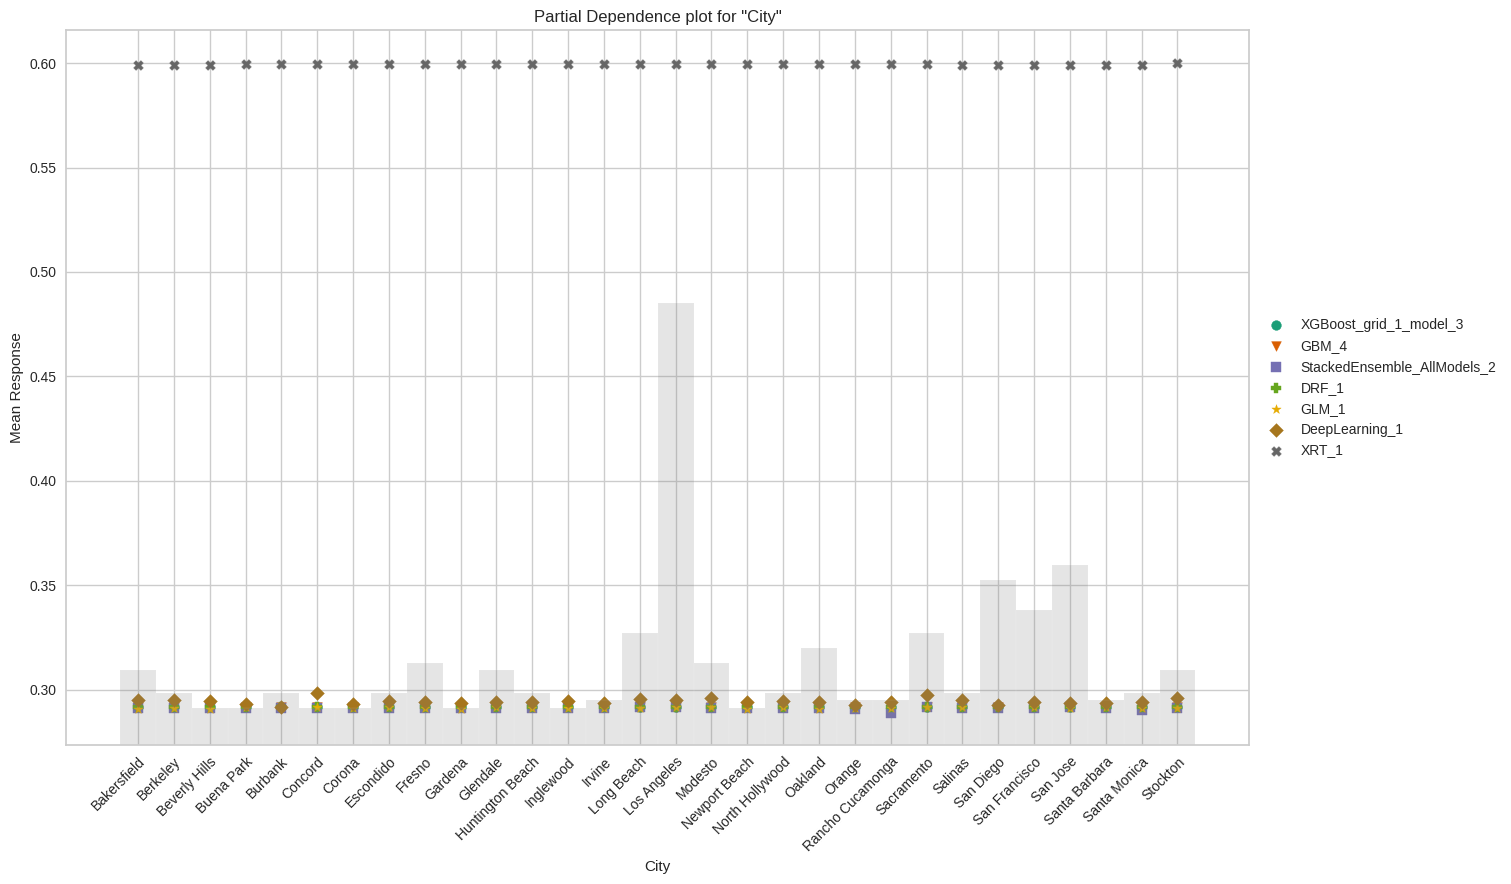

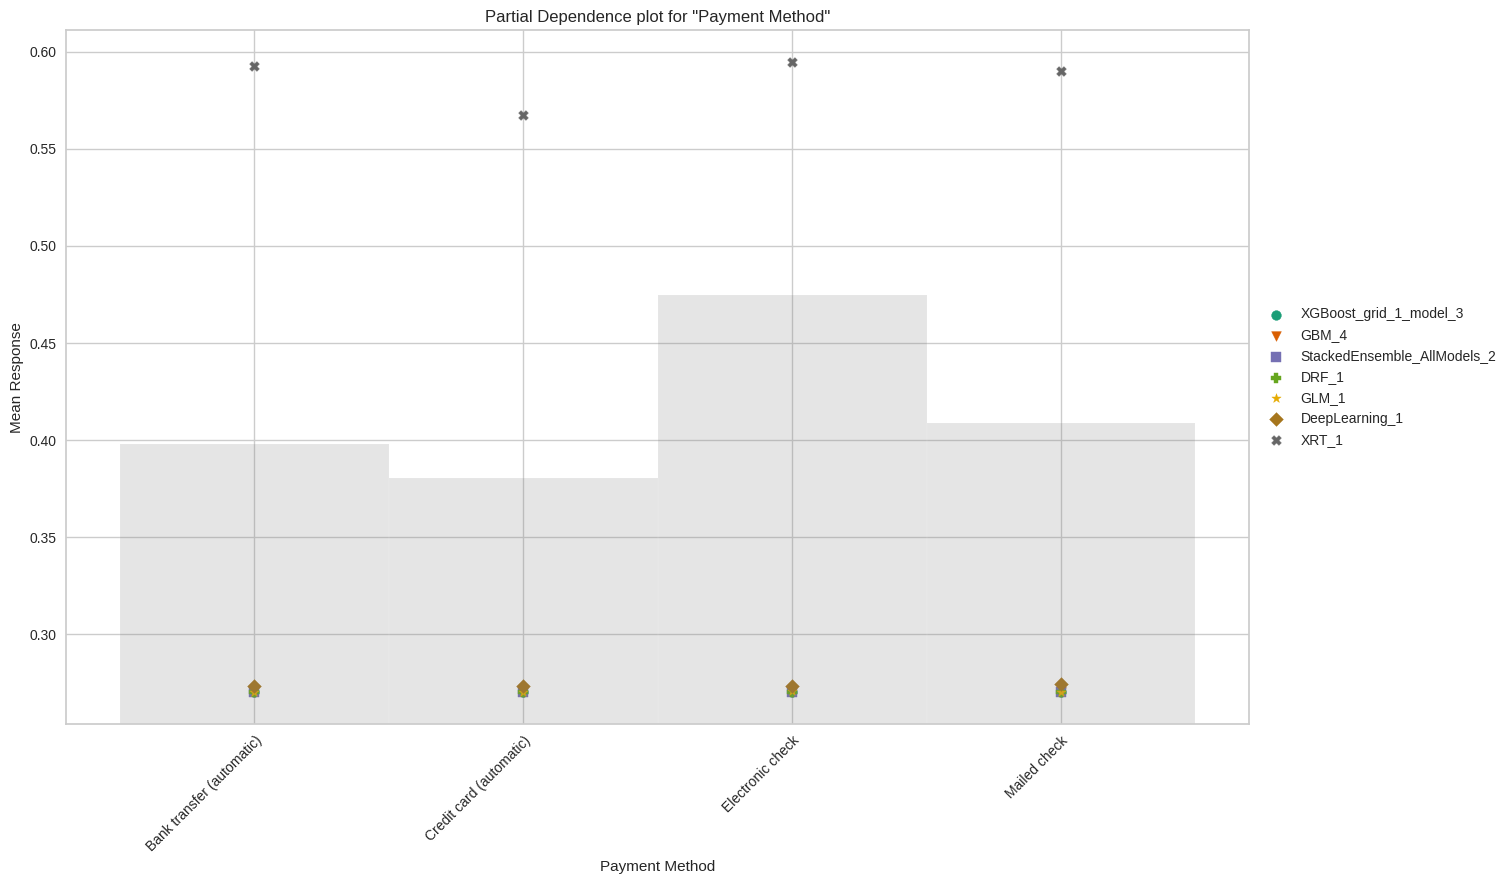

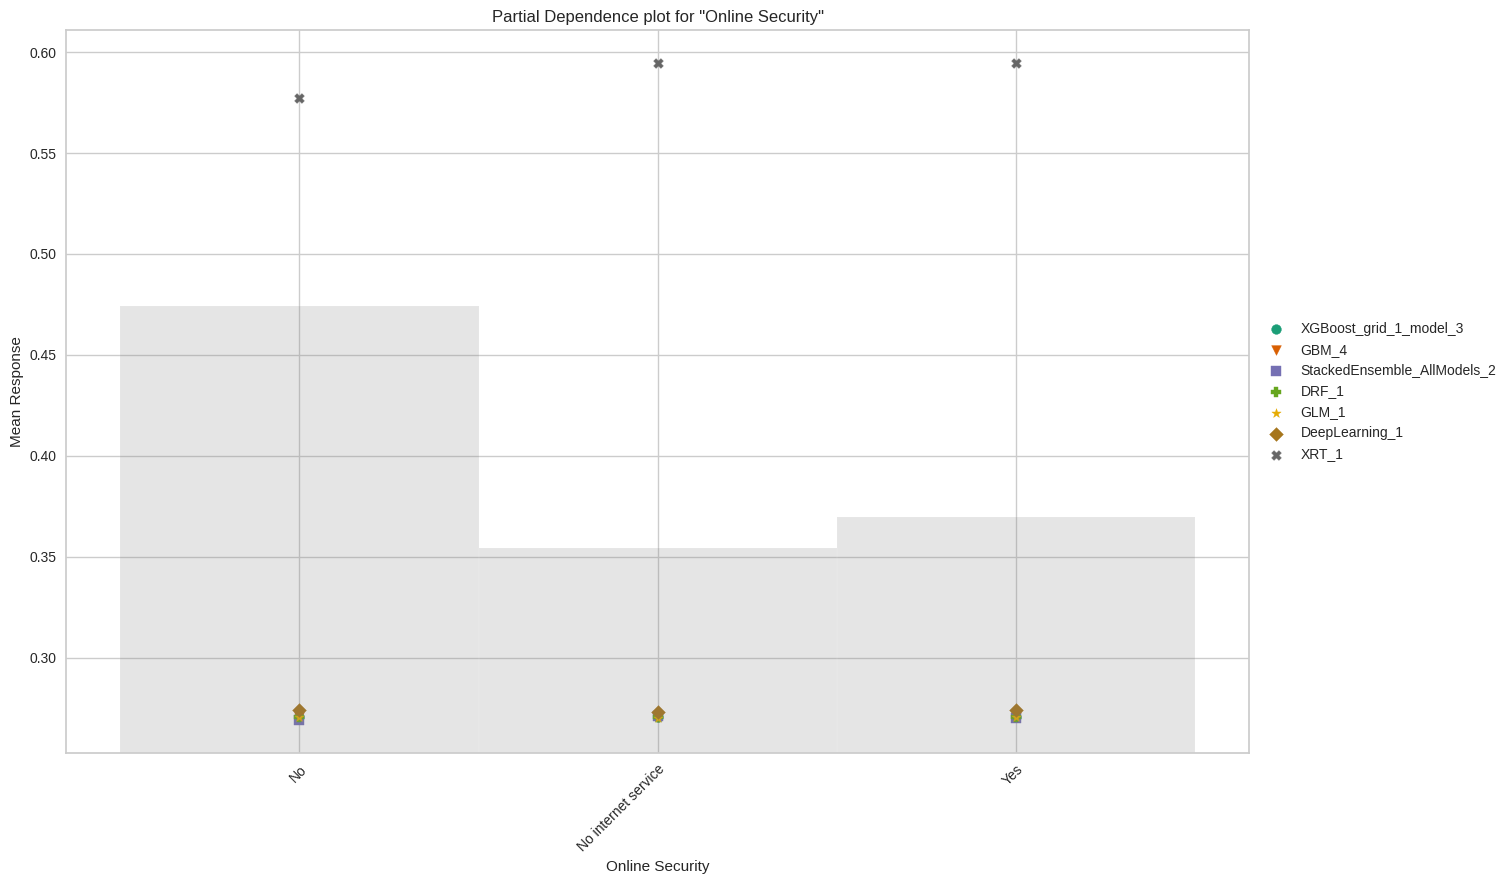

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

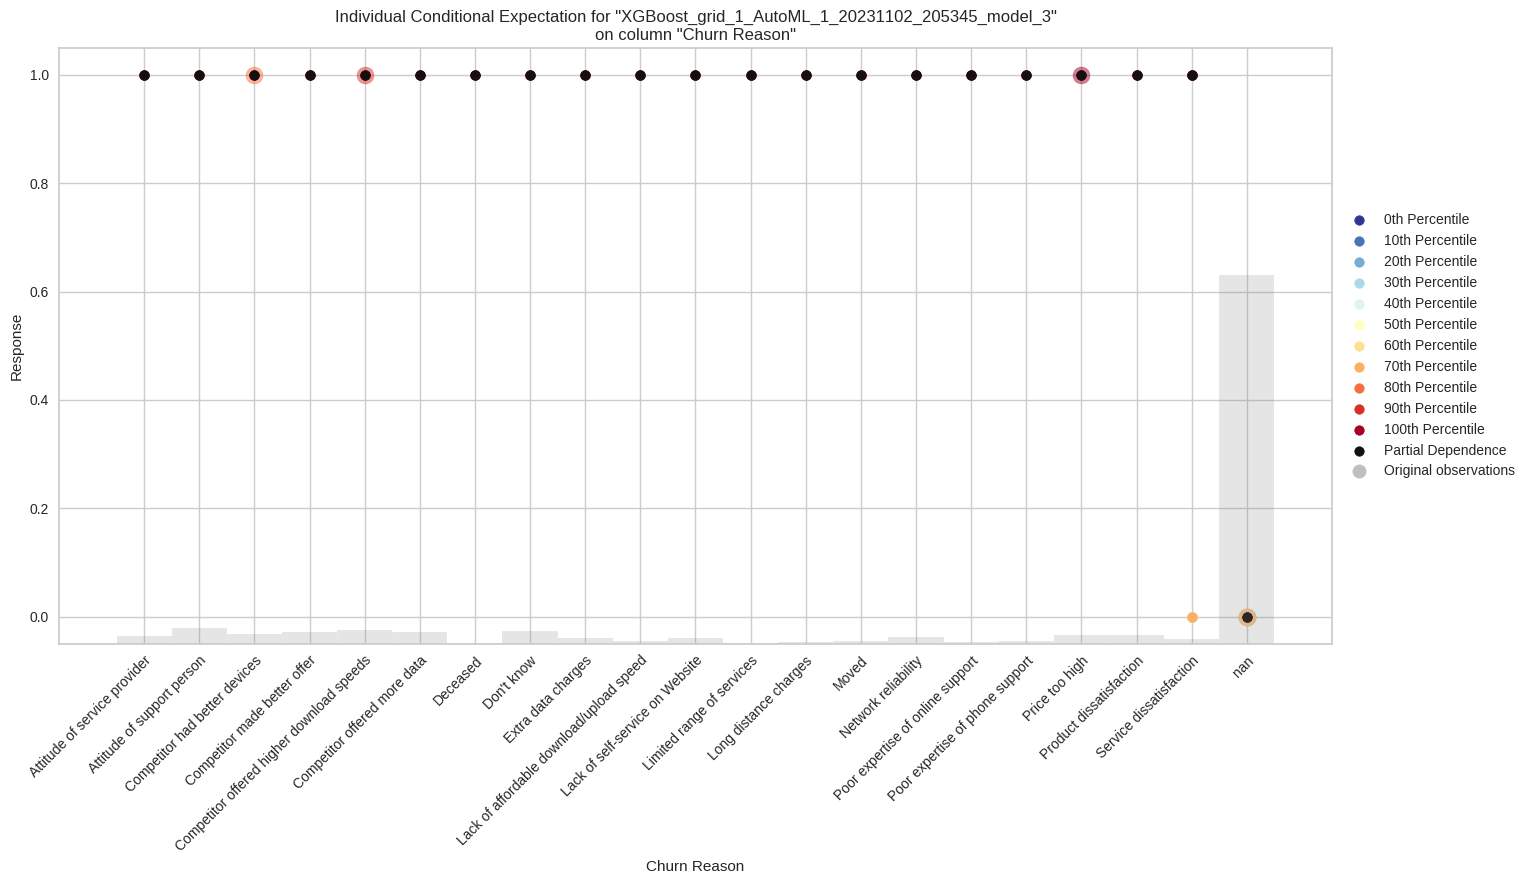

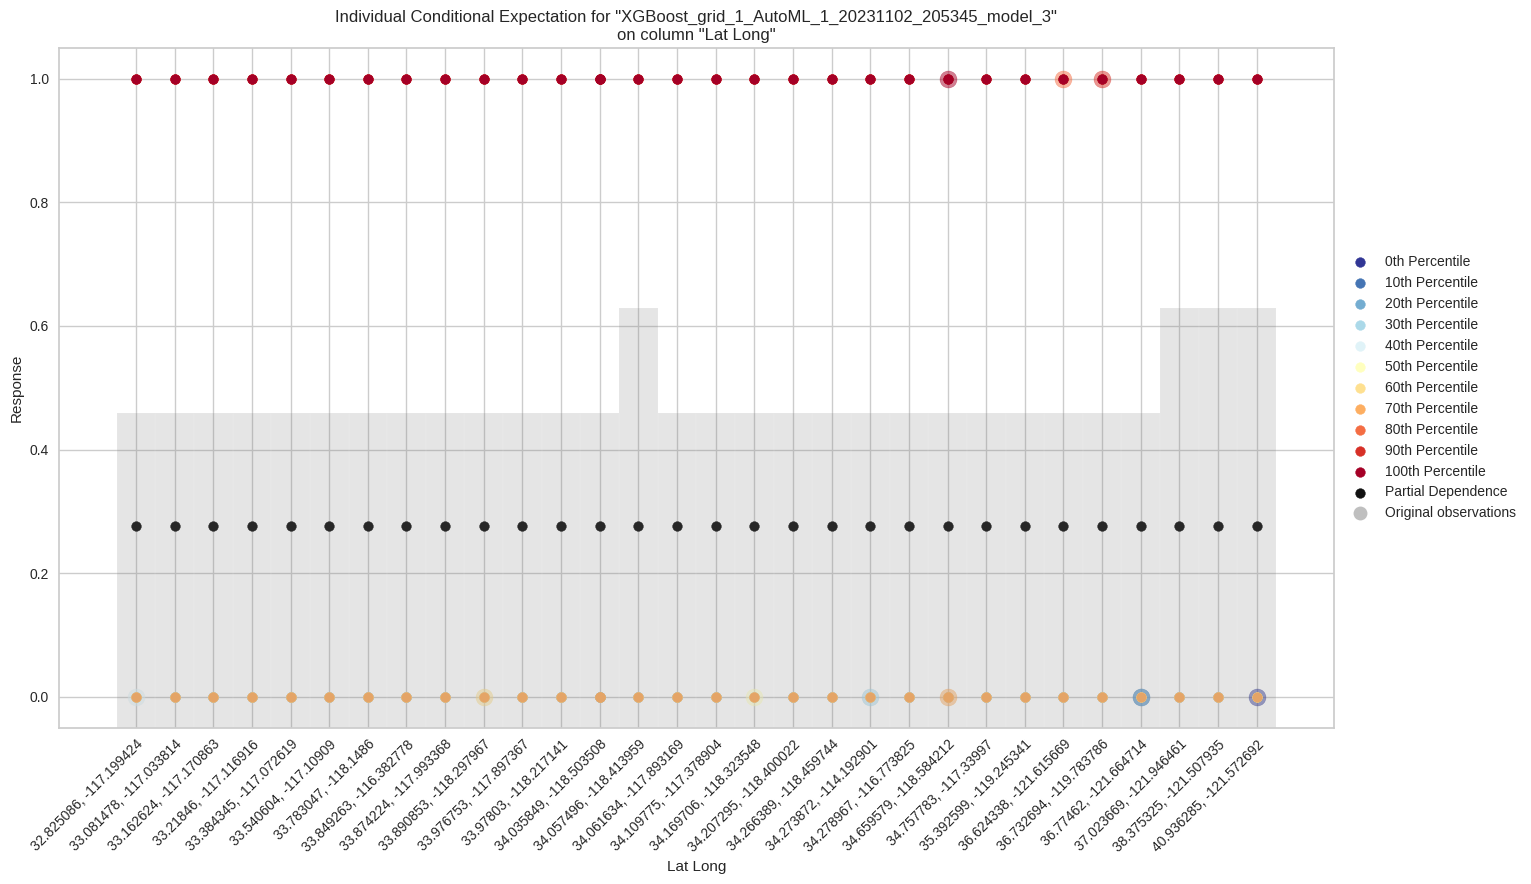

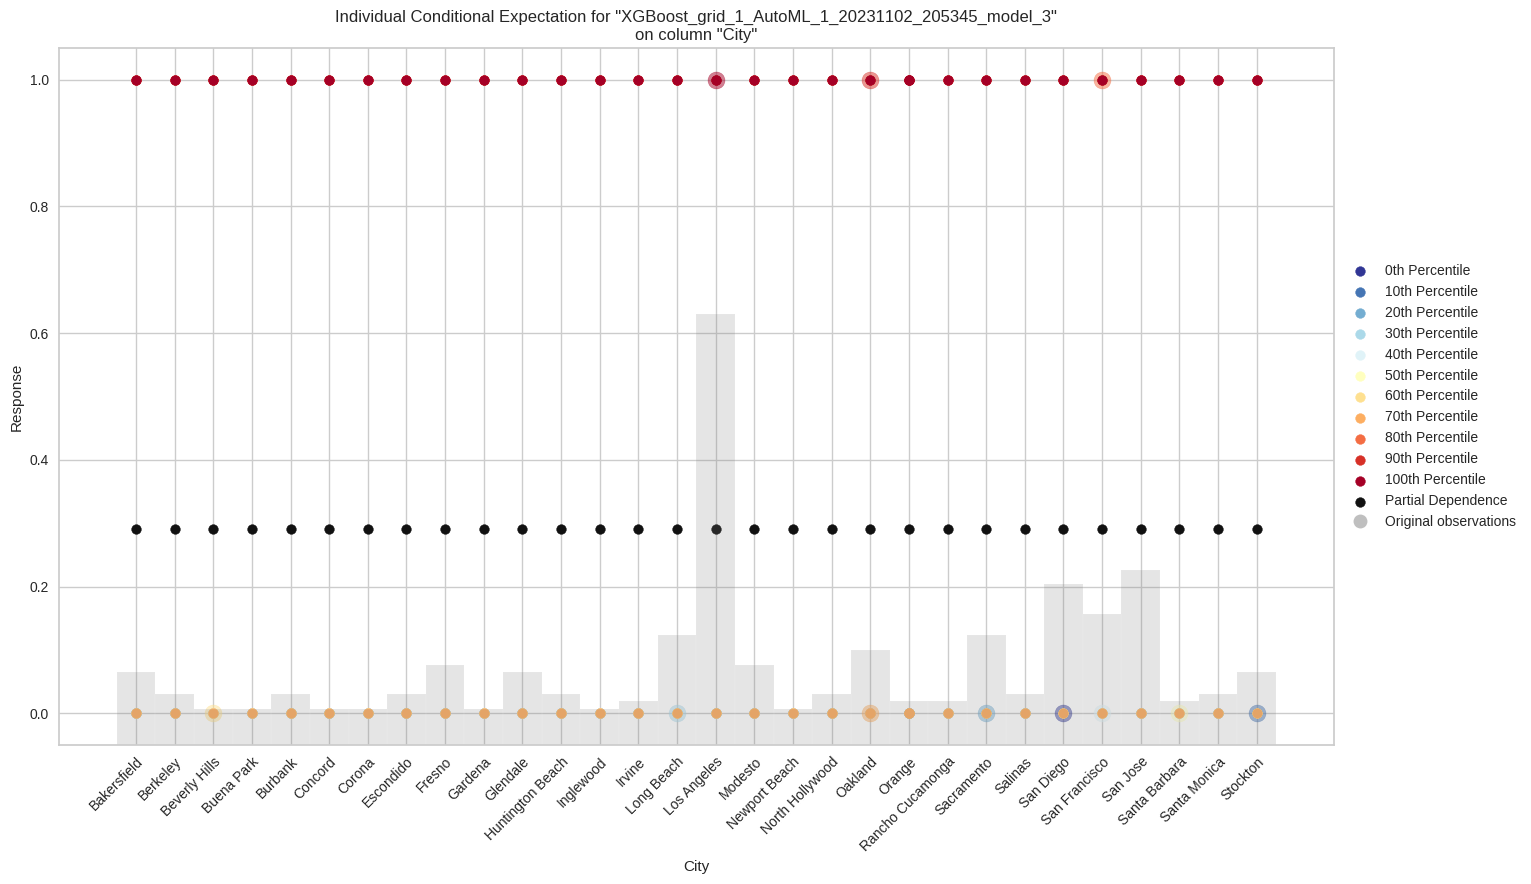

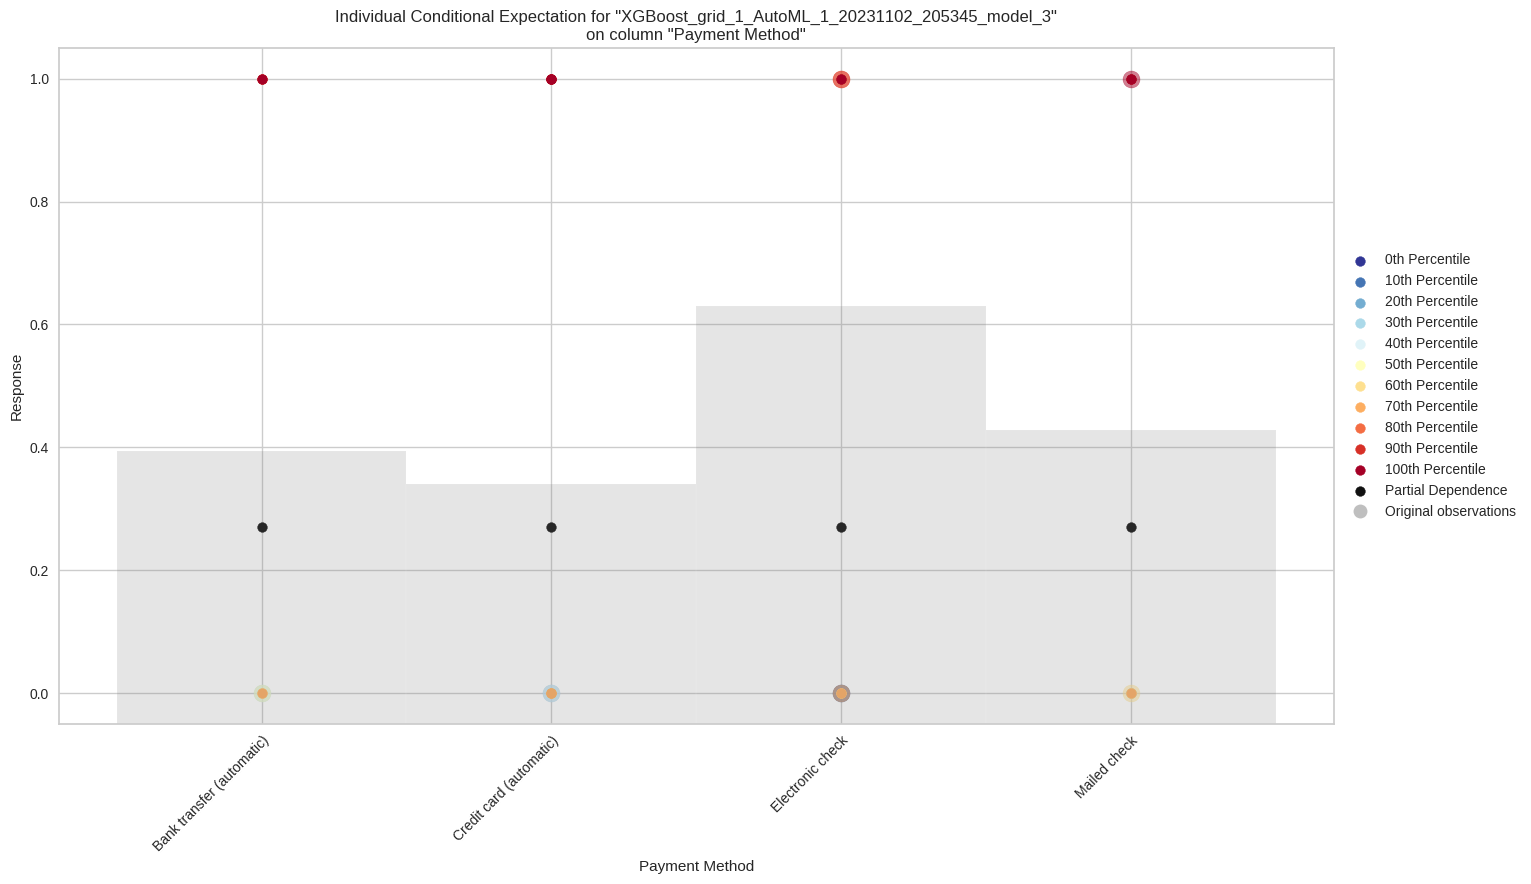

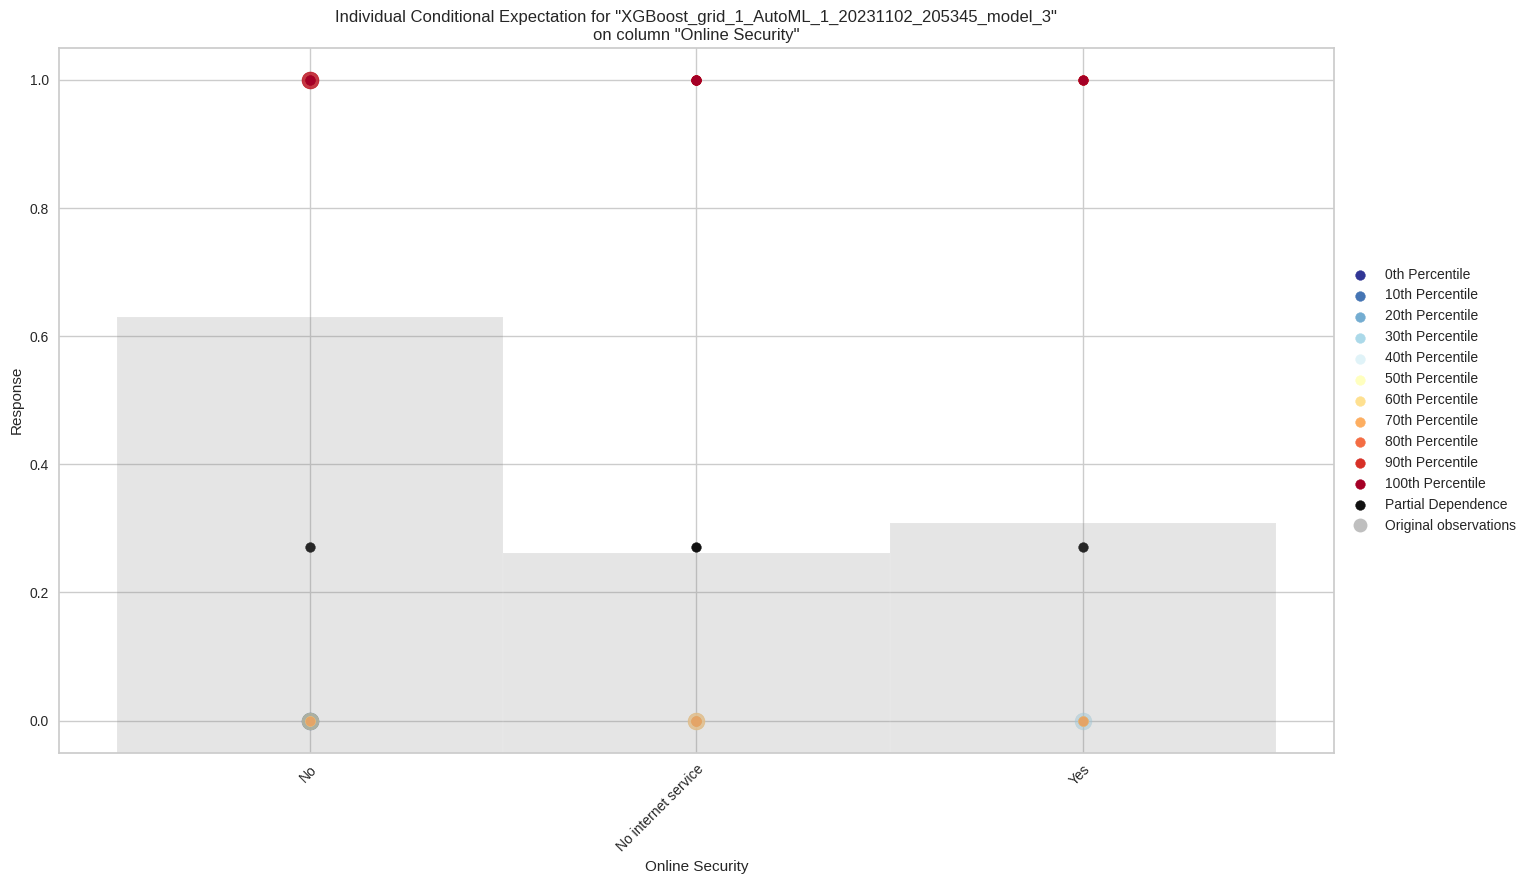

In [135]:
#Data Report

df1_test_h2o = h2o.H2OFrame(df1_test)

# Now use the H2OFrame in the explain method
exa = aml1.explain(df1_test_h2o)

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [137]:
s = dfpd1['Churn_Value']

t = dfpd1.drop(['Churn_Value'], axis = 1)

In [138]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV


In [139]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [140]:
## Here we use RandomizedSearchCV to get the best params inorder to acheive the optimal results.

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [141]:
random_rf.best_params_

{'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 500}

# Conclusion

A meticulous approach was applied to develop a predictive model based on a dataset from a telecommunications company to analyze and predict customer churn. Various facets such as Variance Inflation Factor (VIF), p-values, and visual inspections were utilized to refine the selection of relevant independent variables.

Utilizing the H2O.ai framework, a diverse range of models were trained and evaluated, focusing on their performance and interpretability. Among the models trained, the XGBoost algorithm emerged as a standout, providing a promising blend of accuracy and model interpretability. Detailed evaluations, including residuals analysis and variable importance, were conducted to understand the model's performance and the significant factors influencing customer churn.

Our dedicated efforts have yielded a model that exhibits a robust predictive capacity, providing insightful interpretations of customer churn.

# Assignment Question/Answers


Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true.

Given the collected evidence and the analysis performed, there appears to be a significant relationship in the model. However, it is always beneficial to perform additional validation, like cross-validation, and test the model against an unseen dataset to confirm the model's robustness and significance further.

Based on Model:
Your chosen algorithm (XGBoost) has demonstrated to be effective, as evidenced by its selection through AutoML.
Variable Importance: The most important variables have been identified, and their significance analyzed, adding credibility to the model’s predictive power.
Histograms and KDE Plots: These visualizations have been inspected to understand the distribution of residuals and confirm the model’s appropriateness.

Q2) Are any model assumptions violated? Assumptions for linear regression are:
I have already addressed multicollinearity by examining the VIF.
Normality of residuals and homoscedasticity can be examined visually through the provided plots.

1. Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2. Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
3. No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea.
4. No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation.

Q3) Is there any multicollinearity in the model?

Yes, multicollinearity seems to be present in the model. Multicollinearity occurs when two or more independent variables in the model are highly correlated, making it difficult to determine the effect of each variable independently.

Evidence of Multicollinearity:
Variance Inflation Factor (VIF): The VIF values you provided earlier indicate multicollinearity. For example, the VIF of Count is exceptionally high (15076.32), which is way above the common threshold of 10. This suggests that the variable Count is highly correlated with other variables in the model.

Given the high VIF values, there is evidence of multicollinearity in the model. Action should be taken to address this, as multicollinearity can make the model unstable and the estimates of the coefficients unreliable.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

It appears that in your multivariate model, not all predictor variables are independent of each other. The presence of multicollinearity, as evidenced by the high Variance Inflation Factor (VIF) values, suggests that there are predictor variables in the model that are not independent and show a certain level of linear relationship with other predictors.

The independence of predictor variables is a crucial assumption in regression models to have reliable and interpretable results.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Based on the variable importance plot you shared earlier, it seems that the model has identified "Churn Reason" as the most significant predictor in explaining the variance in the target variable, 'Churn Value'. However, the plot also seems to indicate that many variables are not very impactful in predicting 'Churn Value', as their importance scores are quite low or even zero.

VIF and p-values for Count, Zip Code, Latitude and Longitude  was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

In conclusion, the model appears meaningful with a reasonable R-squared value, suggesting a good fit.

The model constructed for your dataset appears to be rational and exhibits several good qualities. The Variable Importance Plot indicates that some variables such as "Churn Reason" significantly contribute to predicting the churn value. However, there is multicollinearity present in the model, as observed from high Variance Inflation Factors (VIF), which implies that some predictor variables are highly correlated.

Q7)Does regularization help?

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data.

 It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied.

Without Regularization:
R-Squared: Essentially perfect (1.0)
Variable Importance: Many variables appear with some significance in predicting the churn value.
With Regularization:

R-Squared: Lower than without regularization but seems more reasonable (0.9999921684277324)
Variable Importance: Fewer variables like 'Churn Reason' appear more prominent, and some lesser important variables might have been penalized.

Regularization seems to have a beneficial impact on the model by addressing overfitting, aiding in variable selection, and managing the model's complexity. It helps to make the model more robust and potentially improves its performance on unseen data. Hence, regularization appears to have added value in enhancing the model's overall generalizability and predictive accuracy.

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. For this model except for Count,Zipcode and latitude aand longitude all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are : {'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 500}


**References :**

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

This dataset is detailed in:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Downloaded from:
https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics

There are several related datasets as documented in:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2018/09/12/base-samples-for-ibm-cognos-analytics

Professor's AutoML Notebook  https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

**License**

Copyright 2023 Mrunali Pawar

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.